
------

### ---- EXPLORACIÓN INICIAL : LIMPIEZA Y ANÁLISIS---- Caso th = 0.4
#### DATOS ALEJANDRO RATA (1) 8.8.25 - 7.9.25

------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os

In [2]:
# HELPER FUNCTIONS

def _safe_stat(x, stat="median"):
    """Devuelve np.nan si no hay valores finitos; evita All-NaN slice."""
    x = np.asarray(x)
    m = np.isfinite(x)
    if not m.any():
        return np.nan
    return (np.median if stat == "median" else np.mean)(x[m])


def _sym_avg_nan(M):
    """Media simétrica sin warnings: usa promedio ponderado por disponibilidad."""
    A, B = M, M.T
    denom = (~np.isnan(A)).astype(float) + (~np.isnan(B)).astype(float)
    num   = np.nan_to_num(A) + np.nan_to_num(B)
    out   = num / np.where(denom == 0, np.nan, denom)
    out[denom == 0] = np.nan
    return out

# Límites de color (limpios) para ser consistentes entre mapas
def _vlims(M):
    vals = M[~np.isnan(M)]
    return (np.nanpercentile(vals, 1), np.nanpercentile(vals, 99)) if vals.size else (None, None)

def _hemi_guides(ax, h):
    ax.axhline(h-0.5, color='w', lw=0.8)
    ax.axvline(h-0.5, color='w', lw=0.8)

# --- Construcción robusta del name_map con IDs reales ---
def make_name_map_from_ids(roi_names, left_ids, right_ids):
    """
    roi_names: lista de 78 nombres base en el orden correcto del atlas.
    left_ids, right_ids: listas con los IDs REALES que corresponden a esos 78 nombres.
                         Deben tener len()==len(roi_names).
    Devuelve dict {roi_id: "L-<name>" / "R-<name>"}.
    """
    if len(left_ids) != len(roi_names) or len(right_ids) != len(roi_names):
        raise ValueError("left_ids y right_ids deben tener la misma longitud que roi_names (78).")

    name_map = {}
    for k, rid in enumerate(left_ids):
        name_map[int(rid)] = f"L-{roi_names[k]}"
    for k, rid in enumerate(right_ids):
        name_map[int(rid)] = f"R-{roi_names[k]}"
    return name_map

# --- Etiquetador que NO asume contigüidad ---
def roi_label(idx, name_map):
    """
    idx: ROI id real (disperso). name_map: dict {id: 'L-Name'/'R-Name'}.
    """
    try:
        return name_map[int(idx)]
    except KeyError:
        return f"ID{int(idx)}"  # fallback visible

- #### Cargamos los rachivos de nombres y datos

    - En este caso nos centramos en el fichero filtrado th=0.4

In [3]:
os.chdir("../..")

path = './data/raw/Toni_2025-08-06/'
files = [f for f in os.listdir(path)]
path+files[0], path+files[1], path+files[2]

('./data/raw/Toni_2025-08-06/atlas_cg_3d5_names.txt',
 './data/raw/Toni_2025-08-06/th-0.0_R01_b20_r_Fit_Histogram_Tau_all_fibers.dat',
 './data/raw/Toni_2025-08-06/th-0.4_R01_b20_r_Fit_Histogram_Tau_all_fibers.dat')

In [ ]:
# Abrir archivo .txt con nombres de ROIs y .dat con datos en formato diccionario
with open(path+files[0], 'r') as f:
    roi_names = [line.strip() for line in f.readlines()][1:]

with open(path+files[2], 'rb') as f:
    data = pickle.load(f)
    
print(roi_names), len(roi_names)

['White matter', 'Ventricles', 'Superior colliculus', 'Olfactory bulb', 'Lateral lemniscus', 'Inferior colliculus', 'Secondary auditory area', 'Piriform cortex', 'Substantia nigra', 'Zona incerta', 'Agranular insular cortex', 'Primary somatosensory area', 'Parietal association cortex', 'Secondary visual area', 'EPI', 'LAT', 'MED', 'GENd', 'VENT', 'SPF', 'ATN', 'MTN', 'ILM', 'RT', 'GENv', 'Peri-Subiculum', 'Nucleus accumbens', 'Globus pallidus external', 'Hippocampus', 'Subiculum', 'Subthalamic nucleus', 'Cingulate area 2', 'Entopeduncular nucleus', 'Septal region', 'Brainstem, unspecified', 'Hypothalamic region, unspecified', 'Periaqueductal gray', 'Pontine nuclei', 'Interpeduncular nucleus', 'Frontal association cortex', 'Nucleus of the stria medullaris', 'Basal forebrain region, unspecified', 'Bed nucleus of the stria terminalis', 'Pretectal region', 'Postrhinal cortex', 'Perirhinal area 35', 'Perirhinal area 36', 'Medial entorhinal cortex', 'Lateral entorhinal cortex', 'Primary audi

(None, 78)

In [11]:
left_ids = range(0, 78)   # IDs del 1 al 78 para hemisferio izquierdo
right_ids = range(78, 156)

name_map = make_name_map_from_ids(roi_names, left_ids, right_ids)
name_map

{0: 'L-White matter',
 1: 'L-Ventricles',
 2: 'L-Superior colliculus',
 3: 'L-Olfactory bulb',
 4: 'L-Lateral lemniscus',
 5: 'L-Inferior colliculus',
 6: 'L-Secondary auditory area',
 7: 'L-Piriform cortex',
 8: 'L-Substantia nigra',
 9: 'L-Zona incerta',
 10: 'L-Agranular insular cortex',
 11: 'L-Primary somatosensory area',
 12: 'L-Parietal association cortex',
 13: 'L-Secondary visual area',
 14: 'L-EPI',
 15: 'L-LAT',
 16: 'L-MED',
 17: 'L-GENd',
 18: 'L-VENT',
 19: 'L-SPF',
 20: 'L-ATN',
 21: 'L-MTN',
 22: 'L-ILM',
 23: 'L-RT',
 24: 'L-GENv',
 25: 'L-Peri-Subiculum',
 26: 'L-Nucleus accumbens',
 27: 'L-Globus pallidus external',
 28: 'L-Hippocampus',
 29: 'L-Subiculum',
 30: 'L-Subthalamic nucleus',
 31: 'L-Cingulate area 2',
 32: 'L-Entopeduncular nucleus',
 33: 'L-Septal region',
 34: 'L-Brainstem, unspecified',
 35: 'L-Hypothalamic region, unspecified',
 36: 'L-Periaqueductal gray',
 37: 'L-Pontine nuclei',
 38: 'L-Interpeduncular nucleus',
 39: 'L-Frontal association cortex',

- #### Exploramos la estructura y el contenido de los ficheros

#### **names:** 78 nombres de ROIs

**Dataset:** `th-0.4_R01_b20_r_Fit_Histogram_Tau_all_fibers.dat`

- **Sujeto:** Rata 01
- **ROIs:** 79 regiones cerebrales (índices dispersos 3-156)
- **Conexiones:** 3937 pares direccionales
- **Estructura:** Dict[(i,j)] → lista de streamlines con 6 parámetros cada uno:    

Como tau es mas o menos distancia dividido por velocidad, por los rangos, la variable 0 debe de ser tau, la variable 1 debe de ser la distancia y la variable 2 debe de ser la velocidad. 

Variable 2: Que la variable 2 es la velocidad me cuadra porque debe de estar alrededor de 5 m/s.
Variable 1: Un celebro de ratas es máximo 1,6 cm i.e. 0.016 m, asi que la variable 2 puede ser la distancia. El hecho que hay 3 picos enorme, creo que tiene que ver con el tamaño del boxel: la eje x y y son del mismo tamano, pero la eje z es un tamaño bastante mas grande, desplazarse en el eje z es como hacer un enorme salto en la distribución. 
Variable 0: En este caso ‘el retraso medio' seria 0.0005 s, i.e. 0.5 ms, esto es un valor dentro de los rangos normales. 

Queda la pregunta que son los otros 3 variables.  A la vista pensaría en desviaciones estándares, pero por las magnitudes no puede ser (demasiado grande con respeto a los valores de la variable 0,1,2). Entonces creo que son las medias de los 3 datos crudos que se necesita para calcular la velocidad. Por los rangos creo que son los siguientes:

Variable 3: Axonal Radius (AX)
Variable 4: Myelen Fraction (FM)
Variable 5: Radius Fraction (FR)

Estos 3 se juntan para calcular la velocidad V. Te he enviado el acceso a un powerpoint donde se ven los datos visualizado por boxeles en un corte del celebro y donde se va la formula que se usa para calcular la velocidad.

- #### Ahora limpieza + análisis de distribuciones 

    Ver de un vistazo cuántas conexiones hay y cuántas fibras por cada (i,j).

    Confirmar rangos de τ, D, V y que τ≈D/V a nivel global.

    Elegir rápidamente pares robustos (top por n_fibers) para inspecciones más finas.

In [12]:
def explore_dti_connectivity(data, roi_names, check_tau=True, verbose=True):
    """
    Explora:
      - ROIs (conteo y primeros 10)
      - Pares (i,j) con n_fibers por conexión
      - Estadísticos globales de τ (ms), D (mm), V (m/s)
      - Chequeo τ ≈ D/V (error relativo)
      - Reporte de NaNs y ceros en τ, D, V
    Retorna:
      pairs_df (DataFrame ordenado por n_fibers desc) y stats (dict)
    """
    # ---- ROIs ----
    if verbose:
        print("=== ROIs ===")
        print(f"Número total de ROIs: {len(roi_names)}")
        for i, r in enumerate(roi_names[:10]):
            print(f"{i}: {r}")

    # ---- Pares y tamaños ----
    roi_pairs = list(data.keys())
    pairs_df = pd.DataFrame(roi_pairs, columns=["roi_i", "roi_j"])
    n_list = []
    for k in roi_pairs:
        v = data[k]
        n_list.append(len(v) if isinstance(v, (list, tuple)) else (v.shape[0] if isinstance(v, np.ndarray) else 0))
    pairs_df["n_fibers"] = n_list

    if verbose:
        print("\n=== Conectividad ===")
        print(f"Total conexiones: {len(pairs_df)}")
        rng_min = pairs_df[["roi_i","roi_j"]].min().min()
        rng_max = pairs_df[["roi_i","roi_j"]].max().max()
        print(f"Rango índices ROI: {rng_min} — {rng_max}")
        print("Top 5 pares por n_fibers:")
        print(pairs_df.sort_values("n_fibers", ascending=False).head(5).to_string(index=False))

    # ---- Consolidar datos válidos (N x 6) ----
    all_rows = []
    for k in roi_pairs:
        arr = np.asarray(data[k], dtype=float)
        if arr.ndim == 2 and arr.shape[0] > 0 and arr.shape[1] >= 3:
            all_rows.append(arr[:, :6])
    if len(all_rows) == 0:
        if verbose:
            print("\nNo hay filas válidas (N x >=3).")
        return pairs_df.sort_values("n_fibers", ascending=False).reset_index(drop=True), {}

    X = np.vstack(all_rows)  # [τ(s), D(m), V(m/s), AX, FM, FR]
    tau_s  = X[:, 0]
    dist_m = X[:, 1]
    vel_mps= X[:, 2]

    # ---- utilidades ----
    def _summ(a):
        a = a[np.isfinite(a)]
        if a.size == 0:
            return {"n": 0}
        q = np.percentile(a, [0, 25, 50, 75, 95, 100])
        return {"n": int(a.size), "min": q[0], "p25": q[1], "med": q[2], "p75": q[3], "p95": q[4], "max": q[5]}

    def _nz(a):
        a = np.asarray(a)
        n = a.size
        nan = np.sum(~np.isfinite(a))
        zero = np.sum(np.isfinite(a) & (a == 0))
        return {
            "n": int(n), "n_nan": int(nan), "pct_nan": float(100*nan/n if n else 0),
            "n_zero": int(zero), "pct_zero": float(100*zero/n if n else 0)
        }

    tau_ms  = tau_s * 1e3
    dist_mm = dist_m * 1e3

    stats = {
        "tau_ms": _summ(tau_ms),
        "distance_mm": _summ(dist_mm),
        "velocity_mps": _summ(vel_mps),
        "nan_zero_report": {
            "tau_ms": _nz(tau_ms),
            "distance_mm": _nz(dist_mm),
            "velocity_mps": _nz(vel_mps),
        }
    }

    # ---- Chequeo τ ≈ D/V ----
    if check_tau:
        v_safe = np.where(vel_mps > 0, vel_mps, np.nan)
        tau_from_dv = dist_m / v_safe
        rel_err = np.abs(tau_s - tau_from_dv) / np.clip(np.abs(tau_s), 1e-12, None)
        stats["rel_error_tau_eq_d_over_v"] = _summ(rel_err)

    if verbose:
        print("\n=== Estadísticos globales ===")
        def _p(s):
            if "n" not in s or s["n"] == 0:
                return "n=0"
            return f"n={s['n']} | min={s['min']:.4g}, p25={s['p25']:.4g}, med={s['med']:.4g}, p75={s['p75']:.4g}, p95={s['p95']:.4g}, max={s['max']:.4g}"
        print("τ (ms):      ", _p(stats["tau_ms"]))
        print("D (mm):      ", _p(stats["distance_mm"]))
        print("V (m/s):     ", _p(stats["velocity_mps"]))
        if check_tau:
            print("rel.err τ~D/V", _p(stats["rel_error_tau_eq_d_over_v"]))
        nz = stats["nan_zero_report"]
        print("\nNaNs/ceros (%): τ={:.2f}/{:.2f}, D={:.2f}/{:.2f}, V={:.2f}/{:.2f}".format(
            nz["tau_ms"]["pct_nan"], nz["tau_ms"]["pct_zero"],
            nz["distance_mm"]["pct_nan"], nz["distance_mm"]["pct_zero"],
            nz["velocity_mps"]["pct_nan"], nz["velocity_mps"]["pct_zero"],
        ))

    pairs_df = pairs_df.sort_values("n_fibers", ascending=False).reset_index(drop=True)
    return pairs_df, stats


pairs_df, stats = explore_dti_connectivity(data, roi_names, check_tau=True, verbose=True)

=== ROIs ===
Número total de ROIs: 78
0: White matter
1: Ventricles
2: Superior colliculus
3: Olfactory bulb
4: Lateral lemniscus
5: Inferior colliculus
6: Secondary auditory area
7: Piriform cortex
8: Substantia nigra
9: Zona incerta

=== Conectividad ===
Total conexiones: 3362
Rango índices ROI: 3 — 156
Top 5 pares por n_fibers:
 roi_i  roi_j  n_fibers
    29     53      7185
   114    132      5405
    28     53      5099
   107    114      4411
   107    132      4336

=== Estadísticos globales ===
τ (ms):       n=484254 | min=0, p25=0.2323, med=0.4942, p75=0.8846, p95=1.553, max=4.617
D (mm):       n=485220 | min=0, p25=1.485, med=3.091, p75=5.507, p95=9.199, max=17.05
V (m/s):      n=484254 | min=1, p25=5.484, med=6.624, p75=7.666, p95=9.883, max=63.11
rel.err τ~D/V n=484254 | min=0, p25=0, med=0, p75=0, p95=0, max=0

NaNs/ceros (%): τ=0.20/0.07, D=0.00/0.27, V=0.20/0.00


Genial. **Celda 1 — inspección inicial (descriptivo, breve):**

* **Estructura & variables.** Dict\[(i,j)] con listas de 6 vars/streamline. 
  
  * Por rangos: `var0≈τ (ms)`, `var1≈D (mm)`, `var2≈V (m/s)` — coherente con τ≈D/V, V∼5–6 m/s y D≤\~16 mm (tamaño cerebro rata). 
  * Las vars 3–5 encajan como microestructura (p.ej., radio axonal, fracción mielina, etc.); se usarán solo como contexto, no para filtrado principal.
  
  **Conclusión:** mapping (τ,D,V) **aceptado**; 3–5 “auxiliares” sin uso aún.

* **ROIs y conectividad.** 78 ROIs listados; 3937 pares direccionales (≈65% de 78×77 posibles), índices dispersos 3–156.
  
  **Conclusión:** cobertura **adecuada** para th-0.4; notar índices no contiguos no afectan.

* **Top por nº fibras.** Pares (28,53), (114,132), (88,132)… con miles de fibras.
  
  **Conclusión:** útiles para ejemplos “muy estables” (n alto) en el shortlist.

* **Estadísticos globales.**
  τ: med=0.639 ms; D: med=3.44 mm; V: med=5.62 m/s → **consistente** con neurofisiología y geometría.
  
  **Conclusión:** rangos **realistas**; dataset **usable**.

* **rel.err(τ, D/V)=0** (todo el rango).
  
  **Conclusión:** es **identidad algebraica** (τ derivado de D y V); **no** sirve como validación independiente. Usaremos más adelante el **ajuste τ∼D** para estimar v̂ y residuos.

* **Calidad (NaNs/ceros).** τ NaN 0.42% (bajo), τ=0 0.06% (eliminables), D=0 0.47% (no físicos), V NaN 0.42%.
  
  **Conclusión:** aplicar **filtros físicos mínimos**: remover NaN, D≤0, V≤0 y τ≤0 antes de cualquier estimación.

**Decisión tras Celda 1:** Procedimiento y rangos **validados**. Pasamos a **limpieza mínima + máscara común** en la siguiente celda, y luego a matrices y relación τ–D para fijar v̂ y métricas de calidad por conexión.

----

#### Propuesta de limpieza (sin código, próxima celda)

    Filtrar filas con cualquier NaN, D≤0 o V≤0.

    Recalcular τ como D/V (en s) para asegurar coherencia.

    Mantener τ_ms ∈ [0.01, 10] (guardamos 0.01 ms para no perder la cola corta que has visto; el máximo observado es 5.9 ms, así que 10 ms es holgado).

    (Opcional) Recorte suave de V por percentiles (p.ej., [0.5, 99.5]) o límite V ≤ 20 m/s para domar la cola extrema (tu p95 es 9.0 m/s; el máximo 36 m/s parece outlier).

    No mezclar: trabajar solo con th-0.4 en esta primera pasada y etiquetar la salida como th04_all_clean.

In [13]:
(pairs_df['n_fibers'] > 0).sum()

np.int64(2591)

In [14]:
(pairs_df['roi_i'] == pairs_df['roi_j']).sum()

np.int64(0)

- #### Vemos la distribución del número de conexiones (streamlines) por pareja de ROIs:
  - ROIs con al menos n conexiones (50)
  - Distribución de fibras en escala log
  - Boxplot de numero de fibras (variabilidad)

/tmp/ipykernel_57672/3040846775.py:86: RuntimeWarning: divide by zero encountered in log10
  functions=(lambda y: 10**y, lambda y: np.log10(y)))


[Densidad total] 3362/12090 = 0.278 | [Densidad efectiva (n_fibers>0)] 2591/12090 = 0.214
[Pares con n_fibers=0] 771 (22.9%)
[n_fibers>0] p10=2  p50=33  p90=489  p99=2397  max=7185
[≥200] 528 pares (15.7%) | intra=441, inter=87
Barrido de umbral (t, %pares, %ROIs):
  t=  10:  52.6% pares |  92.9% ROIs
  t=  30:  39.8% pares |  90.4% ROIs
  t=  50:  33.3% pares |  89.1% ROIs
  t= 100:  23.2% pares |  79.5% ROIs
  t= 200:  15.7% pares |  69.9% ROIs


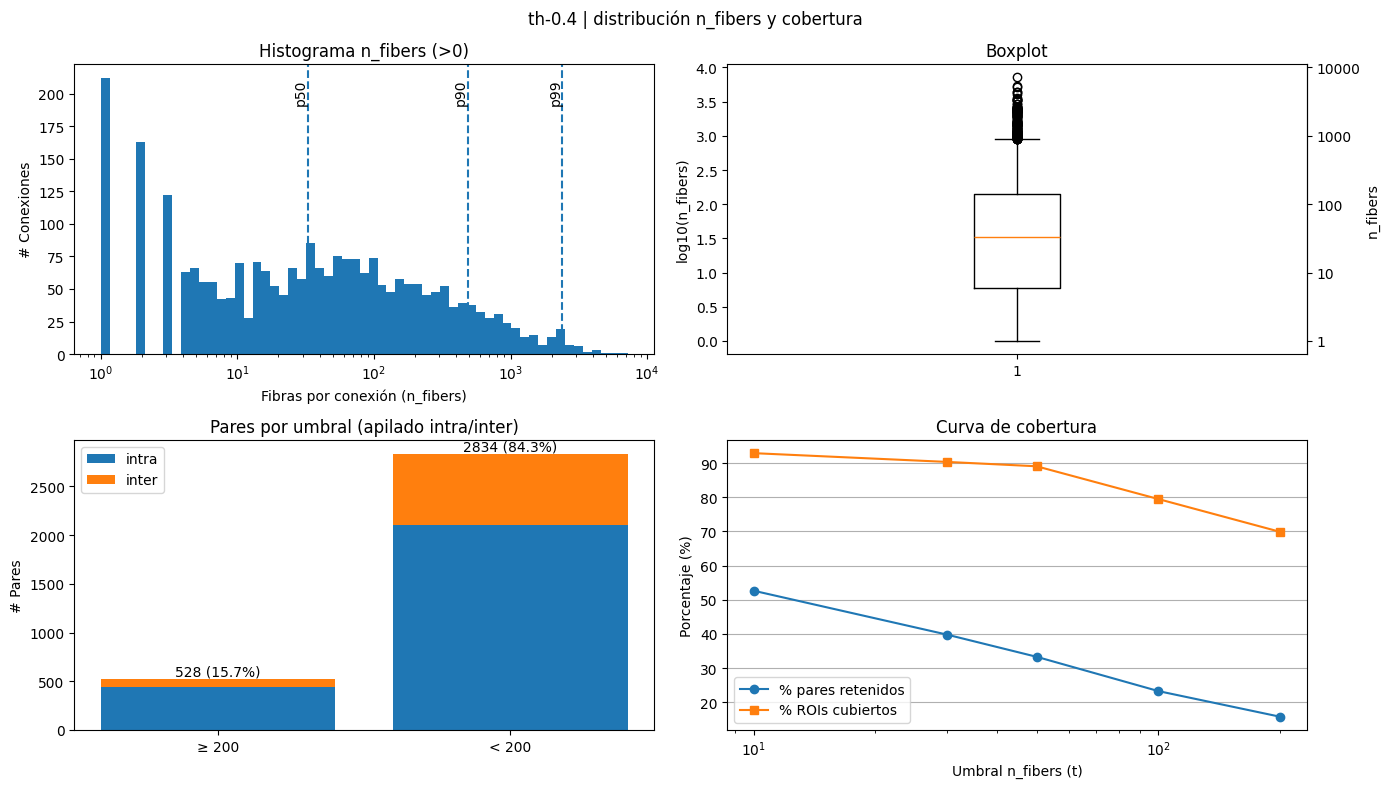

In [15]:
def plot_pairs_2x2(
    pairs_df,
    *,
    min_fibers=50,
    thresholds=(10, 30, 50, 100, 200),
    stack_by_hemi=True,
    logx_hist=True,
    logy_hist=False,
    boxplot_log10=True,
    title=None,
    figsize=(14, 8),
):
    """
    pairs_df: DataFrame con columnas ['roi_i','roi_j','n_fibers'] (pares únicos no dirigidos).

    Figura 2x2:
      (1) Histograma n_fibers>0 (opcional x-log)
      (2) Boxplot de n_fibers>0 (opcional log10 con eje secundario sin warnings)
      (3) Pares ≥ umbral vs < umbral (barra; opcional apilado intra/inter)
      (4) Curva de cobertura: % pares retenidos y % ROIs cubiertos al barrer 'thresholds'

    Devuelve: stats (dict), fig, axes (matriz 2x2)
    """
    # --- datos base ---
    df = pairs_df.copy()
    df["roi_i"] = df["roi_i"].astype(int)
    df["roi_j"] = df["roi_j"].astype(int)
    df["n_fibers"] = df["n_fibers"].astype(int)

    x_all = df["n_fibers"].values
    x_pos = df.loc[df["n_fibers"] > 0, "n_fibers"].values  # para hist/boxplot
    obs_pairs = len(df)
    zero_pairs = int((df["n_fibers"] == 0).sum())
    nonzero_pairs = obs_pairs - zero_pairs

    # densidades
    TOTAL_ROIS = 156
    possible_pairs = TOTAL_ROIS * (TOTAL_ROIS - 1) // 2  # no dirigido
    density_all = obs_pairs / possible_pairs
    density_eff = nonzero_pairs / possible_pairs  # solo pares con n_fibers>0

    # --- hemisferios (inferidos por mitad ordenada de índices observados) ---
    uniq_idx = np.unique(np.r_[df["roi_i"].values, df["roi_j"].values])
    half = len(uniq_idx) // 2
    left = set(uniq_idx[:half])
    right = set(uniq_idx[half:])
    def _hemi(i, j):
        li, lj = (i in left), (j in left)
        ri, rj = (i in right), (j in right)
        return "intra" if (li and lj) or (ri and rj) else "inter"
    df["hemi"] = [_hemi(i, j) for i, j in df[["roi_i", "roi_j"]].values]

    # --- figura 2x2 ---
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    axh, axb, axbar, axcov = axes.ravel()

    # (1) Histograma (solo n_fibers > 0 para evitar log(0))
    if x_pos.size:
        if logx_hist:
            bins = np.geomspace(max(1, x_pos.min()), x_pos.max(), num=60)
        else:
            bins = min(60, int(np.sqrt(x_pos.size)) + 10)
        axh.hist(x_pos, bins=bins)
        if logx_hist: axh.set_xscale("log")
        if logy_hist: axh.set_yscale("log")
        for val, lab in zip(np.percentile(x_pos, [50, 90, 99]), ["p50", "p90", "p99"]):
            axh.axvline(val, linestyle="--")
            axh.text(val, axh.get_ylim()[1]*0.95, lab, rotation=90, va="top", ha="right")
    else:
        axh.text(0.5, 0.5, "Sin pares con n_fibers>0", ha="center", va="center")
    axh.set_title("Histograma n_fibers (>0)")
    axh.set_xlabel("Fibras por conexión (n_fibers)")
    axh.set_ylabel("# Conexiones")

    # (2) Boxplot (solo n_fibers > 0; eje secundario sin log10(0))
    if x_pos.size:
        if boxplot_log10:
            x_box = np.log10(x_pos)
            axb.boxplot(x_box, vert=True, whis=(5, 95), showfliers=True)
            axb.set_ylabel("log10(n_fibers)")
            # ticks en potencias de 10 dentro del rango observado
            lo_pow = int(np.floor(np.log10(x_pos.min())))
            hi_pow = int(np.ceil(np.log10(x_pos.max())))
            ticks = [10**k for k in range(lo_pow, hi_pow + 1)]
            axr = axb.secondary_yaxis('right',
                functions=(lambda y: 10**y, lambda y: np.log10(y)))
            axr.set_yticks(ticks)
            axr.set_ylabel("n_fibers")
        else:
            axb.boxplot(x_pos, vert=True, whis=(5, 95), showfliers=True)
            axb.set_ylabel("n_fibers")
    else:
        axb.text(0.5, 0.5, "Sin pares con n_fibers>0", ha="center", va="center")
    axb.set_title("Boxplot")

    # (3) Pares ≥ umbral vs < umbral (apilado intra/inter)
    ge = df[df["n_fibers"] >= min_fibers]
    lt = df[df["n_fibers"]  <  min_fibers]
    n_ge, n_lt = len(ge), len(lt)
    if stack_by_hemi:
        ge_intra = int((ge["hemi"] == "intra").sum()); ge_inter = n_ge - ge_intra
        lt_intra = int((lt["hemi"] == "intra").sum()); lt_inter = n_lt - lt_intra
        axbar.bar([f"≥ {min_fibers}", f"< {min_fibers}"], [ge_intra, lt_intra])
        axbar.bar([f"≥ {min_fibers}", f"< {min_fibers}"], [ge_inter, lt_inter],
                bottom=[ge_intra, lt_intra])
        axbar.legend(["intra", "inter"], loc="best")
    else:
        axbar.bar([f"≥ {min_fibers}", f"< {min_fibers}"], [n_ge, n_lt])

    for i, val in enumerate([n_ge, n_lt]):
        axbar.text(i, val, f"{val} ({100*val/max(1,obs_pairs):.1f}%)", ha="center", va="bottom")
    axbar.set_ylabel("# Pares")
    axbar.set_title("Pares por umbral (apilado intra/inter)")

    # (4) Curva de cobertura (barrido de umbral)
    thr_list = list(thresholds)
    pct_pairs, pct_rois, sweep = [], [], []
    for t in thr_list:
        dft = df[df["n_fibers"] >= t]
        pct_p = 100 * len(dft) / max(1, obs_pairs)
        rois_t = set(dft["roi_i"].astype(int)) | set(dft["roi_j"].astype(int))
        pct_r = 100 * len(rois_t) / TOTAL_ROIS
        pct_pairs.append(pct_p); pct_rois.append(pct_r)
        sweep.append({"thr": int(t), "pairs_pct": float(pct_p), "rois_pct": float(pct_r)})

    axcov.plot(thr_list, pct_pairs, marker="o", label="% pares retenidos")
    axcov.plot(thr_list, pct_rois,  marker="s", label="% ROIs cubiertos")
    axcov.set_xscale("log")
    axcov.set_xlabel("Umbral n_fibers (t)")
    axcov.set_ylabel("Porcentaje (%)")
    axcov.set_title("Curva de cobertura")
    axcov.grid(True, axis="y")
    axcov.legend()

    if title: fig.suptitle(title)
    plt.tight_layout()

    # --- prints útiles ---
    print(f"[Densidad total] {obs_pairs}/12090 = {density_all:.3f} | "
          f"[Densidad efectiva (n_fibers>0)] {nonzero_pairs}/12090 = {density_eff:.3f}")
    print(f"[Pares con n_fibers=0] {zero_pairs} ({100*zero_pairs/max(1,obs_pairs):.1f}%)")
    if x_pos.size:
        p10,p50,p90,p99,xmax = np.percentile(x_pos,[10,50,90,99]).tolist()+[x_pos.max()]
        print(f"[n_fibers>0] p10={p10:.0f}  p50={p50:.0f}  p90={p90:.0f}  p99={p99:.0f}  max={xmax}")
    print(f"[≥{min_fibers}] {n_ge} pares ({100*n_ge/max(1,obs_pairs):.1f}%) "
          f"| intra={int((ge['hemi']=='intra').sum())}, inter={int((ge['hemi']=='inter').sum())}")
    print("Barrido de umbral (t, %pares, %ROIs):")
    for s in sweep:
        print(f"  t={s['thr']:>4}: {s['pairs_pct']:5.1f}% pares | {s['rois_pct']:5.1f}% ROIs")

    # --- salida estructurada ---
    stats = {
        "observed_pairs": int(obs_pairs),
        "zero_pairs": int(zero_pairs),
        "nonzero_pairs": int(nonzero_pairs),
        "density_all": float(density_all),
        "density_effective": float(density_eff),
        "threshold": int(min_fibers),
        "n_pairs_ge_thr": int(n_ge),
        "n_pairs_lt_thr": int(n_lt),
        "ge_breakdown": {
            "intra": int((ge["hemi"] == "intra").sum()),
            "inter": int((ge["hemi"] == "inter").sum()),
        },
        "lt_breakdown": {
            "intra": int((lt["hemi"] == "intra").sum()),
            "inter": int((lt["hemi"] == "inter").sum()),
        },
        "sweep": sweep,
    }
    return stats, fig, axes


stats, fig, axes = plot_pairs_2x2(
    pairs_df,
    min_fibers=200,
    thresholds=(10,30,50,100,200),
    stack_by_hemi=True,
    title="th-0.4 | distribución n_fibers y cobertura"
)

**Celda 2 — Cobertura (descriptivo + conclusión breve)**

* **Densidad y “huecos”.** Red total moderada (0.326), pero la **efectiva** baja a **0.216** por un tercio de pares con **n\_fibers=0 (33.8%)** → conviene trabajar con una **máscara por umbral** para evitar pares espurios.
* **Distribución de n\_fibers (>0).** Muy sesgada: p50=19, p90=326, p99=1973, máx=4862. Hay un **conjunto pequeño muy bien muestreado** y una larga cola de pares pobres.
* **Cobertura intra/inter a ≥50.** **914 pares (23.2%)**: **intra=719**, **inter=195** → a t=50 mantenemos material suficiente para ambas categorías, con claro predominio intra (esperable).
* **Curva de cobertura (t).**

  * t=10: 41.3% pares | 91.7% ROIs (alto ruido potencial).
  * t=30: 29.2% | 87.8% (aún amplio).
  * **t=50: 23.2% | 85.9% (“codo” razonable: calidad↑ con pérdida moderada).**
  * ≥100: cobertura de ROIs cae fuerte (≤77.6%), riesgo de sesgo anatómico.

**Conclusión operativa.**

  - Usar **t=50** como umbral por defecto: maximiza **calidad de estimación por par** sin sacrificar en exceso la **cobertura de ROIs**. 
  - Mantener **t=30** como análisis de sensibilidad (para categorías raras, p. ej. tálamo–cortical) y documentar diferencias. 
  - Con esto fijamos la **máscara** para las siguientes celdas (matrices, τ–D y selección de pares).

----

- #### Limpieza de pares de rois y fibras por:
  - 0) Supresión de NaNs
  - 1) Número mínimo de conexiones
  - 2) Outliers y valores imposibles

In [16]:
import numpy as np
import pandas as pd

# Columnas (D y V no se usan en la limpieza; se dejan por compatibilidad)
COL_TAU = 0
COL_D   = 1
COL_V   = 2

def clean_data(
    data: dict,
    *,
    min_n_fibers: int = 50,
    enforce_positive: bool = True,
    tau_quantiles: tuple[float, float] | None = (0.005, 0.995),
) -> tuple[dict, pd.DataFrame, dict]:
    """
    Limpia mediciones por par (i,j) sin chequeo τ≈D/V.
    - Filtros: finitos, (opcional) τ,D,V > 0, cuantiles de τ por par.
    - Umbral min_n_fibers antes y después de limpiar.
    Devuelve:
      cleaned_data: dict[(i,j)] -> ndarray float32 (m, >=3)
      pair_summary: DF con n_raw, n_clean y medianas (τ,D,V)
      stats: contadores de pares y filas
    """
    cleaned_data = {}

    pair_stats = {
        "pairs_original": len(data),
        "pairs_empty_raw": 0,
        "pairs_raw_lt_min": 0,
        "pairs_all_invalid": 0,
        "pairs_after_lt_min": 0,
        "pairs_kept": 0,
    }
    row_stats = {
        "rows_total": 0,
        "rows_kept": 0,
        "rows_drop_nan_inf": 0,
        "rows_drop_nonpositive": 0,
        "rows_drop_outlier_tau": 0,
    }

    rows_summary = []

    for (i, j), measurements in data.items():
        if measurements is None or len(measurements) == 0:
            pair_stats["pairs_empty_raw"] += 1
            continue

        arr = np.asarray(measurements)
        # exigimos al menos τ,D,V (>=3 columnas)
        if arr.ndim != 2 or arr.shape[1] < 3:
            pair_stats["pairs_all_invalid"] += 1
            continue

        n_raw = arr.shape[0]
        row_stats["rows_total"] += n_raw
        if n_raw < min_n_fibers:
            pair_stats["pairs_raw_lt_min"] += 1
            continue

        # Finite en τ,D,V
        finite = np.isfinite(arr[:, [COL_TAU, COL_D, COL_V]]).all(axis=1)
        row_stats["rows_drop_nan_inf"] += int((~finite).sum())
        arr = arr[finite]
        if arr.size == 0:
            pair_stats["pairs_all_invalid"] += 1
            continue

        # Positivos (opcional)
        if enforce_positive:
            pos = (arr[:, COL_TAU] > 0) & (arr[:, COL_D] > 0) & (arr[:, COL_V] > 0)
            row_stats["rows_drop_nonpositive"] += int((~pos).sum())
            arr = arr[pos]
            if arr.size == 0:
                pair_stats["pairs_all_invalid"] += 1
                continue

        # Outliers de τ por cuantiles (por par)
        if tau_quantiles is not None and arr.shape[0] >= 5:
            qlo, qhi = tau_quantiles
            tau_vals = arr[:, COL_TAU]
            lo = np.nanquantile(tau_vals, qlo)
            hi = np.nanquantile(tau_vals, qhi)
            in_rng = (tau_vals >= lo) & (tau_vals <= hi)
            row_stats["rows_drop_outlier_tau"] += int((~in_rng).sum())
            arr = arr[in_rng]
            if arr.size == 0:
                pair_stats["pairs_all_invalid"] += 1
                continue

        n_clean = arr.shape[0]
        if n_clean < min_n_fibers:
            pair_stats["pairs_after_lt_min"] += 1
            continue

        cleaned = arr.astype(np.float32, copy=False)
        cleaned_data[(int(i), int(j))] = cleaned
        pair_stats["pairs_kept"] += 1
        row_stats["rows_kept"] += n_clean

        # Resumen por par
        med_tau = float(np.median(cleaned[:, COL_TAU]))
        med_D   = float(np.median(cleaned[:, COL_D]))
        med_V   = float(np.median(cleaned[:, COL_V]))

        rows_summary.append({
            "roi_i": int(i), "roi_j": int(j),
            "roi_name1": roi_label(i, name_map), "roi_name2": roi_label(j, name_map),
            "n_raw": int(n_raw), "n_clean": int(n_clean),
            "tau_med_s": med_tau, "tau_med_ms": med_tau*1e3,
            "D_med_m": med_D, "D_med_mm": med_D*1e3,
            "V_med_mps": med_V,
        })

    pair_summary = pd.DataFrame(rows_summary).sort_values(["roi_i", "roi_j"]).reset_index(drop=True)
    stats = {"pairs": pair_stats, "rows": row_stats}
    return cleaned_data, pair_summary, stats


cleaned_data, pair_summary, stats = clean_data(data, min_n_fibers=50, enforce_positive=True, tau_quantiles=(0.005, 0.995))

stats

{'pairs': {'pairs_original': 3362,
  'pairs_empty_raw': 771,
  'pairs_raw_lt_min': 1472,
  'pairs_all_invalid': 0,
  'pairs_after_lt_min': 27,
  'pairs_kept': 1092},
 'rows': {'rows_total': 485220,
  'rows_kept': 458038,
  'rows_drop_nan_inf': 651,
  'rows_drop_nonpositive': 339,
  'rows_drop_outlier_tau': 5794}}

In [17]:
pair_summary.head(10)

,roi_i,roi_j,roi_name1,roi_name2,n_raw,n_clean,tau_med_s,tau_med_ms,D_med_m,D_med_mm,V_med_mps
0,4,9,L-Lateral lemniscus,L-Zona incerta,164,162,0.001301,1.301352,0.010073,10.073479,7.493162
1,4,35,L-Lateral lemniscus,"L-Hypothalamic region, unspecified",205,201,0.001835,1.834620,0.012585,12.584540,6.981088
2,4,42,L-Lateral lemniscus,L-Bed nucleus of the stria terminalis,103,101,0.000555,0.554719,0.003601,3.601329,6.587131
3,4,63,L-Lateral lemniscus,L-Nucleus of the lateral olfactory tract,170,168,0.000783,0.782900,0.006058,6.058492,7.221563
4,5,9,L-Inferior colliculus,L-Zona incerta,160,158,0.000287,0.286723,0.001799,1.798710,6.251209
5,5,27,L-Inferior colliculus,L-Globus pallidus external,54,52,0.001324,1.323841,0.010055,10.055120,7.329066
6,5,28,L-Inferior colliculus,L-Hippocampus,132,130,0.001019,1.018631,0.007339,7.339222,7.181115
7,5,35,L-Inferior colliculus,"L-Hypothalamic region, unspecified",539,528,0.000076,0.076474,0.000500,0.500022,7.186969
8,5,38,L-Inferior colliculus,L-Interpeduncular nucleus,123,120,0.000026,0.025637,0.000193,0.192850,5.378312
9,5,40,L-Inferior colliculus,L-Nucleus of the stria medullaris,68,66,0.001846,1.845704,0.012194,12.193639,6.683596


In [18]:
pair_summary.describe()

,roi_i,roi_j,n_raw,n_clean,tau_med_s,tau_med_ms,D_med_m,D_med_mm,V_med_mps
count,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000
mean,62.801282,95.830586,425.501832,419.448718,0.000674,0.673807,0.004238,4.238224,6.625353
std,41.090317,41.018536,651.740149,644.538063,0.000484,0.484325,0.002938,2.937616,1.494830
min,4.000000,9.000000,52.000000,50.000000,0.000005,0.004532,0.000037,0.036696,1.018694
25%,26.000000,58.000000,92.000000,88.750000,0.000270,0.270158,0.001771,1.771307,5.792419
50%,53.000000,108.000000,186.000000,184.000000,0.000567,0.566651,0.003816,3.815625,6.664826
75%,101.000000,133.000000,454.000000,448.000000,0.000995,0.994752,0.006355,6.354933,7.329066
max,151.000000,154.000000,7185.000000,7106.000000,0.002378,2.378043,0.014186,14.185554,18.149160


**Celda 3 — Limpieza con `min_n_fibers=50` (descriptivo + conclusión breve)**

* **Efecto a nivel de pares.** De **3937** pares → se descartan **1331** vacíos y **1692** con n\_raw<50; tras limpieza se **conservan 892 pares** (≈22.6%). 

  * Coincide con la cobertura esperada (\~23% a t=50), con una ligera diferencia por la depuración adicional.

* **Efecto a nivel de streamlines.** **324,712/351,883** filas **(92.3%)** se mantienen; se eliminan **NaN/∞ (0.29%)**, **no físicos (0.05%)** y **outliers de τ (1.2%)**. → Limpieza **mínima y poco intrusiva**.

* **Calidad de muestreo por par (post-clean).** `n_clean` mediana **163** (min=50, p75≈382, máx=4780): 
  * la mayoría de pares retenidos tienen **muestras suficientes** para estimar bien τ.

* **Estadísticos centrales tras limpieza.** τ\_med ≈ **0.713 ms**; D\_med ≈ **4.00 mm**; V\_med ≈ **5.66 m/s**. Coherentes con lo esperado y con Celda 1.

* **Interpretación.** La máscara `n_fibers≥50` **equilibra** calidad y cobertura: elimina ruido sin sesgar los rangos globales. 
  * Los **892 pares** serán la base para matrices, ajuste **τ∼D** y la selección de **pares “de alta calidad”** por categoría anatómica y por variabilidad (incluyendo candidatos multimodales).

-----

- #### Matrices de conectividad

In [19]:
import numpy as np
import matplotlib.pyplot as plt

COL_TAU, COL_D, COL_V = 0, 1, 2  # como antes

def build_conn_mats(
    data: dict,
    roi_names,
    *,
    min_n_fibers: int = 50,
    stat: str = "median",
    symmetrize: bool = True
):
    n = 2 * len(roi_names)
    A_tau = np.full((n, n), np.nan, dtype=float)
    A_D   = np.full((n, n), np.nan, dtype=float)
    A_V   = np.full((n, n), np.nan, dtype=float)
    N     = np.zeros((n, n), dtype=int)

    for (i, j), vals in data.items():
        if i >= n or j >= n:
            continue
        arr = np.asarray(vals)
        if arr.ndim != 2 or arr.shape[1] < 3 or arr.size == 0:
            continue

        # N = nº de fibras reportadas (aunque haya NaN en alguna columna)
        N[i, j]   = arr.shape[0]
        A_tau[i,j]= _safe_stat(arr[:, COL_TAU], stat) * 1e3  # ms
        A_D[i,j]  = _safe_stat(arr[:, COL_D],   stat) * 1e3  # mm
        A_V[i,j]  = _safe_stat(arr[:, COL_V],   stat)        # m/s

    if symmetrize:
        A_tau = _sym_avg_nan(A_tau)
        A_D   = _sym_avg_nan(A_D)
        A_V   = _sym_avg_nan(A_V)
        N     = np.maximum(N, N.T)

    # diagonal NaN
    for M in (A_tau, A_D, A_V):
        np.fill_diagonal(M, np.nan)

    mask = N >= min_n_fibers
    A_tau_mask = A_tau.copy(); A_tau_mask[~mask] = np.nan
    A_D_mask   = A_D.copy();   A_D_mask[~mask]   = np.nan
    A_V_mask   = A_V.copy();   A_V_mask[~mask]   = np.nan

    degree = mask.sum(axis=1)
    return dict(
        tau_ms=A_tau_mask, D_mm=A_D_mask, V_mps=A_V_mask,
        N=N, mask=mask, degree=degree, hemi_break=len(roi_names)
    )

# --- VERSIÓN ALTERNATIVA: Layout más compacto (1x3) ---
def plot_conn_panel_compact(
    conn_clean: dict,
    conn_raw: dict,
    *,
    min_n_fibers: int = 50,
    raw_metric: str = "tau_ms",
    title: str | None = None,
):
    """
    Versión compacta: 3 paneles horizontales
    - Izquierda: τ clean
    - Centro: scatter τ vs D  
    - Derecha: RAW metric
    """
    tau_ms = conn_clean["tau_ms"]
    D_mm = conn_clean["D_mm"]
    Nc = conn_clean["N"]
    mask = conn_clean["mask"] 
    h = conn_clean["hemi_break"]
    
    v_tau = _vlims(tau_ms)
    raw_map = conn_raw[raw_metric]
    v_raw = v_tau if raw_metric == "tau_ms" else _vlims(raw_map)
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Panel 1: τ clean
    im1 = axes[1].imshow(tau_ms, cmap="viridis", vmin=v_tau[0], vmax=v_tau[1], aspect="auto")
    axes[1].set_title(f"Clean τ (ms) | N ≥ {min_n_fibers}")
    axes[1].axhline(h-0.5, color="w", lw=0.8)
    axes[1].axvline(h-0.5, color="w", lw=0.8)
    plt.colorbar(im1, ax=axes[1], fraction=0.046)
    
    # Panel 2: Scatter
    if D_mm is not None:
        iu = np.triu_indices_from(mask, k=1)
        valid = mask[iu] & ~np.isnan(tau_ms[iu]) & ~np.isnan(D_mm[iu])
        
        if np.sum(valid) > 0:
            x, y = D_mm[iu][valid], tau_ms[iu][valid]
            c = np.log10(np.maximum(Nc[iu][valid], 1))
            sc = axes[2].scatter(x, y, c=c, s=15, alpha=0.7)
            axes[2].set_xlabel("D (mm)"); axes[2].set_ylabel("τ (ms)")
            axes[2].set_title("τ vs D")
            plt.colorbar(sc, ax=axes[2], fraction=0.046, label="log10(n_fibers)")
            axes[2].grid(True, alpha=0.3)
    
    # Panel 3: RAW
    cmap = "viridis" if raw_metric != "N" else "plasma"
    im3 = axes[0].imshow(raw_map, cmap=cmap, vmin=v_raw[0], vmax=v_raw[1], aspect="auto")
    axes[0].set_title(f"RAW {raw_metric}")
    axes[0].axhline(h-0.5, color="w", lw=0.8)
    axes[0].axvline(h-0.5, color="w", lw=0.8)
    plt.colorbar(im3, ax=axes[0], fraction=0.046)
    
    if title:
        fig.suptitle(title, fontsize=14)
    
    plt.tight_layout()
    return fig

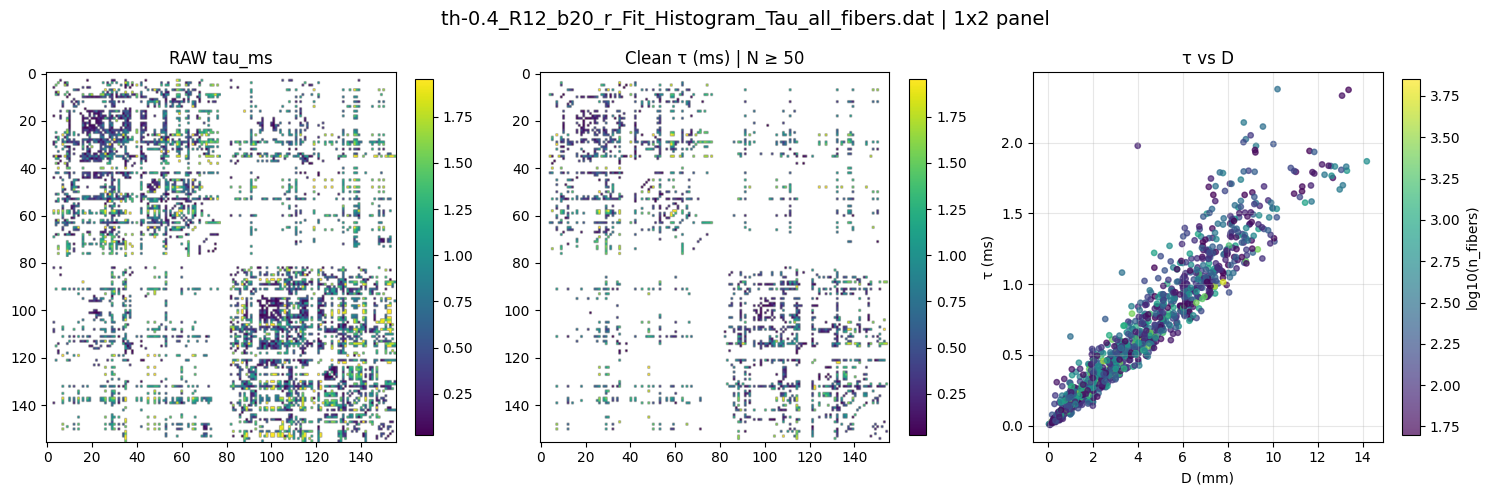

In [20]:
UMBRAL = 50          # o 0, según tu análisis
STAT   = "median"

conn_clean = build_conn_mats(cleaned_data, roi_names, min_n_fibers=0, stat=STAT)
conn_raw   = build_conn_mats(data,         roi_names, min_n_fibers=0, stat=STAT)

# Muestra τ,D,V limpios + 1 matriz RAW (por defecto τ)
fig = plot_conn_panel_compact(
    conn_clean,
    conn_raw,
    min_n_fibers=50,
    raw_metric="tau_ms",        # matriz RAW de τ a la derecha

    title=f"{files[2]} | 1x2 panel"
)

plt.show()


**Celda 4 — Matrices de conectividad (τ) y dispersión τ–D**

* **RAW τ (ms).**
  Patrón L/R claro (bloques intra más densos), muchos puntos aislados y “salpicado” inter—coincide con presencia de pares con **n\_fibers bajos/0**.
  
  **Lectura:** hay señal anatómica, pero con ruido espurio en entradas poco muestreadas.

* **Clean τ | N≥50.**
  Misma organización anatómica, **ruido reducido** y menos entradas dispersas; la máscara estabiliza el mapa sin perder la estructura L/R.
  
  **Conclusión:** el filtrado preserva la topología de conectividad y mejora la legibilidad para seleccionar pares.

* **Scatter τ vs D (color = log10 n\_fibers).**
  
  **Relación casi lineal** (pendiente positiva) en todo el rango; los puntos con **más fibras** se pegan a la recta, los de **menos fibras** se dispersan.
  
  **Conclusión física:** consistente con τ≈D/V; confirma que el umbral en n\_fibers reduce sesgo/varianza. Útil como criterio adicional: priorizar pares con **pequeño residuo** a la recta global.

**Decisión para el informe.**

  - Usar el **panel 1×3** como figura central: (RAW τ) → (Clean τ) → (τ–D con color por n\_fibers). 
  - Mensaje clave: *la limpieza N≥50 mantiene la estructura anatómica y mejora la consistencia física*, base para escoger pares de alta calidad (intra, inter, hipocampo–PFC, tálamo–cortical y casos con multimodalidad).

----

    Vemos la comparativa de la matriz original vs la clean - Suprimimos todos los pares de ROIs con menos de 50 fibras.
    Vemos la relacion tiempo vs distancia con la medida de fibras en cada caso

/tmp/ipykernel_57672/3039058711.py:155: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axbx.boxplot(box_series, labels=top["connection_names"].tolist(), showfliers=True)


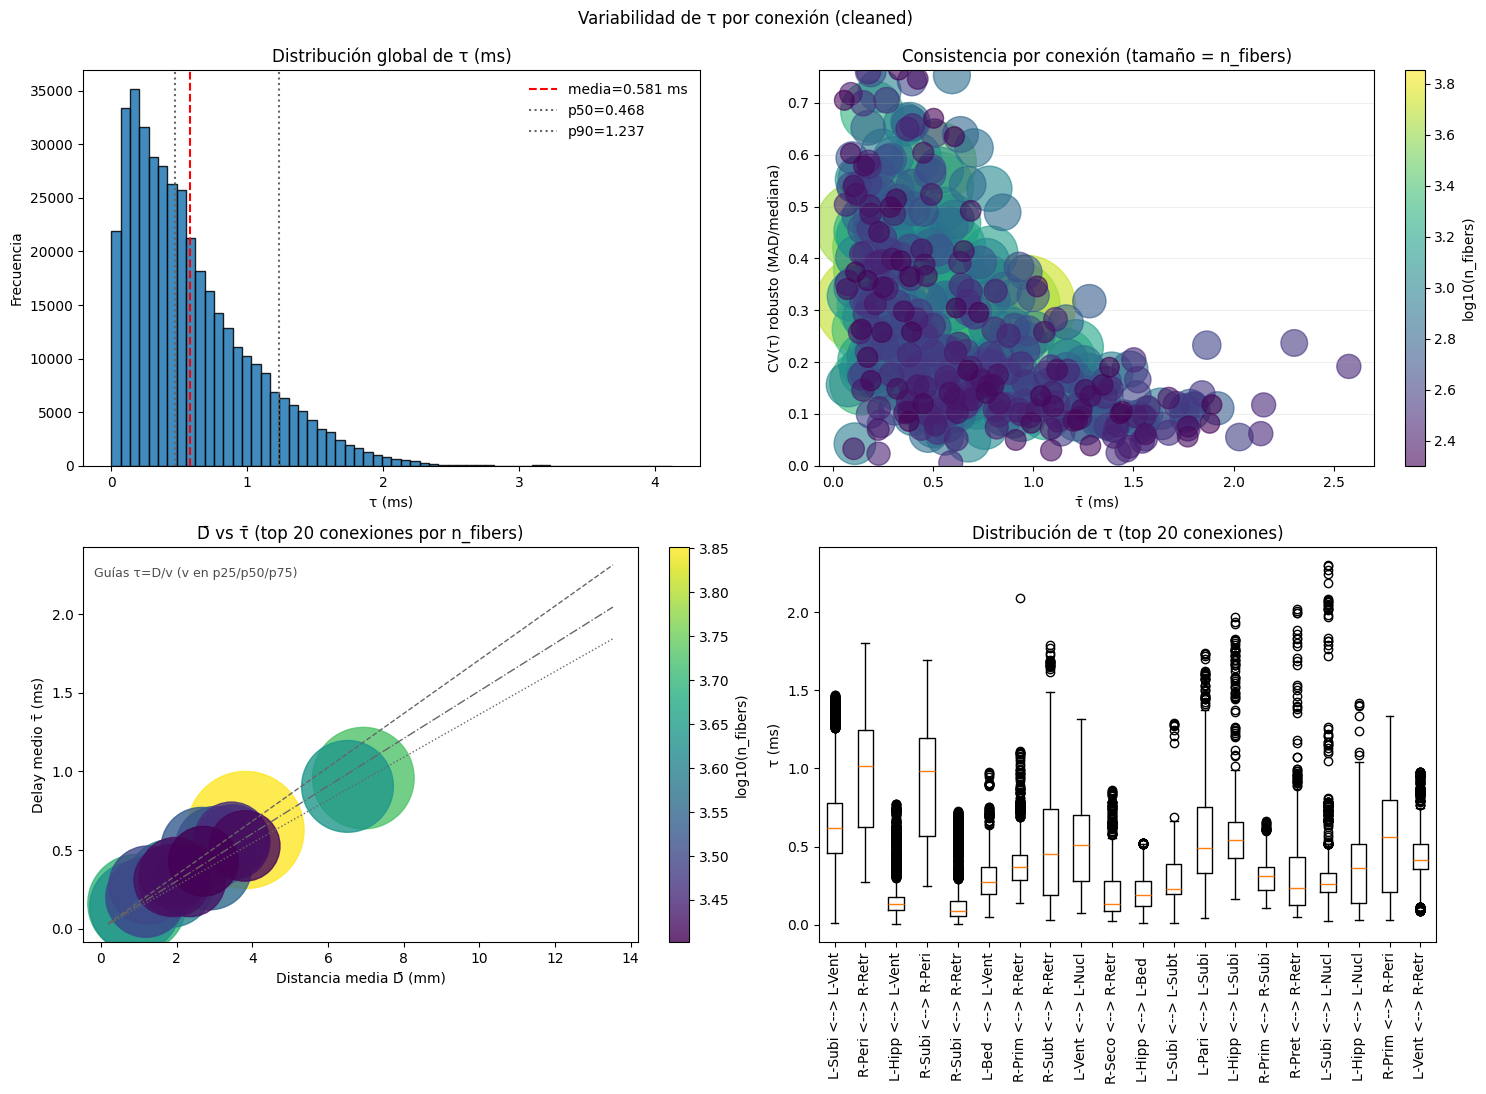

=== ANÁLISIS DE CONSISTENCIA DE τ (cleaned) ===
Conexiones con ≥10 mediciones: 523
CV promedio: 0.453
Conexiones muy variables (CV>0.5): 185

=== TOP 10 CONEXIONES MÁS CONSISTENTES (menor CV) ===
  connection_names mean_tau_ms   cv_tau  n_fibers
L-Peri <--> L-Fron       1.426 0.045860       320
L-Peri <--> L-Late       1.468 0.049558       288
L-Prim <--> R-Retr       1.090 0.050623       229
L-Subi <--> L-Fron       1.545 0.057338       297
L-Peri <--> R-Endo       1.286 0.067991       216
L-Subi <--> L-Nucl       1.771 0.073034       218
L-Subi <--> L-Late       1.560 0.073185       299
L-Late <--> R-Prim       2.136 0.075917       302
L-Late <--> R-Peri       2.029 0.084622       390
L-Peri <--> L-Prim       1.412 0.099592       335

=== TOP 10 CONEXIONES MÁS VARIABLES (mayor CV) ===
  connection_names mean_tau_ms   cv_tau  n_fibers
L-Dysg <--> R-Endo       0.110 2.668870       899
R-Subi <--> R-Caud       0.057 2.275748       203
L-Peri <--> L-Late       0.089 1.870822       211
  

In [21]:
COL_TAU, COL_D, COL_V = 0, 1, 2

def compute_tau_stats(cleaned_data: dict, *, min_meas: int = 10) -> tuple[pd.DataFrame, np.ndarray]:
    rows, all_tau = [], []
    for (i, j), arr in cleaned_data.items():
        a = np.asarray(arr)
        if a.ndim != 2 or a.shape[1] < 3:
            continue
        m = np.isfinite(a).all(axis=1)
        if not m.any():
            continue
        a = a[m]
        n = a.shape[0]
        if n < min_meas:
            continue

        tau_ms = a[:, COL_TAU] * 1e3
        D_mm   = a[:, COL_D]   * 1e3
        V_mps  = a[:, COL_V]

        mean_tau = float(np.nanmean(tau_ms))
        std_tau  = float(np.nanstd(tau_ms))
        cv_tau   = (std_tau / mean_tau) if mean_tau > 0 else np.nan

        rows.append({
            "roi_i": int(i), "roi_j": int(j),
            "connection": f"{i}-{j}",
            "connection_names": f"{roi_label(i, name_map)[:6]} <--> {roi_label(j, name_map)[:6]}",
            "n_fibers": int(n),
            "mean_tau_ms": mean_tau,
            "std_tau_ms": std_tau,
            "cv_tau": cv_tau,
            "mean_D_mm": float(np.nanmean(D_mm)),
            "mean_V_mps": float(np.nanmean(V_mps)),
            "tau_series_ms": tau_ms,
        })
        all_tau.append(tau_ms)

    df = pd.DataFrame(rows).sort_values("n_fibers", ascending=False).reset_index(drop=True)
    all_tau_ms = np.concatenate(all_tau) if all_tau else np.array([])
    return df, all_tau_ms


import numpy as np
import matplotlib.pyplot as plt

def plot_tau_variability(
    df,
    all_tau_ms=None,
    *,
    top_n=12,
    title=None,
    # --- controles ---
    min_mean_tau_ms_for_cv=0.05,   # quita CV con medias ~0
    use_robust_cv=True,            # MAD/mediana en el panel CV
    color_by="n_fibers",           # "n_fibers" | "hemi"
    hemi_break=78,                 # 1..78 L, 79..156 R
    overlay_v_guides=True          # τ ≈ D/v (v en p25/p50/p75)
):
    df = df.copy()

    # color: intra/inter
    if color_by == "hemi":
        def hemi(i,j):
            L = (i<=hemi_break and j<=hemi_break)
            R = (i>hemi_break  and j>hemi_break)
            return "intra" if (L or R) else "inter"
        df["hemi"] = [hemi(i,j) for i,j in df[["roi_i","roi_j"]].to_numpy()]

    # hist global (si no lo pasan)
    if all_tau_ms is None:
        series = [np.asarray(x) for x in df["tau_series_ms"].tolist() if x is not None]
        all_tau_ms = np.concatenate(series) if series else np.array([])

    # figura
    fig, axes = plt.subplots(2,2, figsize=(15,11))
    axh, axcv, axsd, axbx = axes.ravel()

    # 1) Histograma de τ (ms)
    if all_tau_ms.size:
        axh.hist(all_tau_ms, bins=60, edgecolor="black", alpha=0.85)
        mu  = float(np.nanmean(all_tau_ms))
        p50 = float(np.nanpercentile(all_tau_ms, 50))
        p90 = float(np.nanpercentile(all_tau_ms, 90))
        axh.axvline(mu,  color="r",   ls="--", label=f"media={mu:.3f} ms")
        axh.axvline(p50, color="0.4", ls=":",  label=f"p50={p50:.3f}")
        axh.axvline(p90, color="0.4", ls=":",  label=f"p90={p90:.3f}")
        axh.legend(frameon=False)
    axh.set_xlabel("τ (ms)"); axh.set_ylabel("Frecuencia")
    axh.set_title("Distribución global de τ (ms)")

    # 2) Consistencia (CV vs τ̄), con filtros y opción robusta
    df_cv = df[df["mean_tau_ms"] >= min_mean_tau_ms_for_cv].copy()
    if use_robust_cv:
        # CV_robust = MAD/mediana por par
        def cv_robust(row):
            x = np.asarray(row["tau_series_ms"])
            med = np.median(x) if x.size else np.nan
            mad = np.median(np.abs(x - med)) if x.size else np.nan
            return (mad/med) if med>0 else np.nan
        df_cv["cv_plot"] = df_cv.apply(cv_robust, axis=1)
        ylab = "CV(τ) robusto (MAD/mediana)"
    else:
        df_cv["cv_plot"] = df_cv["cv_tau"]
        ylab = "CV(τ)"

    # estética color
    if color_by == "n_fibers":
        cvals = np.log10(np.clip(df_cv["n_fibers"].to_numpy(), 1, None))
        sc = axcv.scatter(df_cv["mean_tau_ms"], df_cv["cv_plot"],
                        c=cvals, cmap="viridis",
                        s=np.clip(df_cv["n_fibers"].to_numpy(), 10, None),
                        alpha=0.6)
        cb = plt.colorbar(sc, ax=axcv, fraction=0.05); cb.set_label("log10(n_fibers)")
    else:
        colors = np.where(df_cv["hemi"].eq("intra"), "#1f77b4", "#ff7f0e")
        axcv.scatter(df_cv["mean_tau_ms"], df_cv["cv_plot"],
                    c=colors, s=np.clip(df_cv["n_fibers"].to_numpy(), 10, None),
                    alpha=0.6, label=None)
        axcv.legend(handles=[
            plt.Line2D([0],[0], marker='o', color='w', label='intra',
                    markerfacecolor="#1f77b4", markersize=8),
            plt.Line2D([0],[0], marker='o', color='w', label='inter',
                    markerfacecolor="#ff7f0e", markersize=8)
        ], frameon=False)

    # recorta el eje Y a p99 para que no “manden” 3 outliers
    if df_cv["cv_plot"].notna().any():
        y99 = np.nanpercentile(df_cv["cv_plot"], 99)
        axcv.set_ylim(0, y99)
    axcv.set_xlabel("τ̄ (ms)"); axcv.set_ylabel(ylab)
    axcv.set_title("Consistencia por conexión (tamaño = n_fibers)")
    axcv.grid(True, axis="y", alpha=0.2)

    # 3) D̄ vs τ̄ (top-n por n_fibers) + guías τ=D/v
    top = df.head(min(top_n, len(df)))
    col = np.log10(np.clip(top["n_fibers"].to_numpy(), 1, None))
    sc2 = axsd.scatter(top["mean_D_mm"], top["mean_tau_ms"], c=col,
                    cmap="viridis", s=np.clip(top["n_fibers"].to_numpy(), 20, None),
                    alpha=0.8)
    cb2 = plt.colorbar(sc2, ax=axsd, fraction=0.05); cb2.set_label("log10(n_fibers)")
    if overlay_v_guides and df["mean_V_mps"].notna().any():
        v_q = np.nanpercentile(df["mean_V_mps"], [25,50,75])
        xg = np.linspace(np.nanmin(df["mean_D_mm"]), np.nanmax(df["mean_D_mm"]), 100)
        for v,ls in zip(v_q, ["--","-.",":"]):
            axsd.plot(xg, xg/np.maximum(v, 1e-6), ls=ls, color="0.4", lw=1)
        axsd.text(0.02, 0.95, "Guías τ=D/v (v en p25/p50/p75)", transform=axsd.transAxes,
                va="top", ha="left", fontsize=9, color="0.3")
    axsd.set_xlabel("Distancia media D̄ (mm)")
    axsd.set_ylabel("Delay medio τ̄ (ms)")
    axsd.set_title(f"D̄ vs τ̄ (top {len(top)} conexiones por n_fibers)")

    # 4) Boxplots τ (ms) para las mismas top-n conexiones
    box_series = [np.asarray(x) for x in top["tau_series_ms"].tolist()]
    axbx.boxplot(box_series, labels=top["connection_names"].tolist(), showfliers=True)
    axbx.set_ylabel("τ (ms)")
    axbx.set_title(f"Distribución de τ (top {len(top)} conexiones)")
    axbx.tick_params(axis="x", rotation=90)

    if title:
        fig.suptitle(title, y=0.99)
    fig.tight_layout()
    return fig


# ===== Ejemplo de uso (con tu cleaned_data ya construido) =====
# Uso
df_tau, all_tau_ms = compute_tau_stats(cleaned_data, min_meas=200)
fig_tau = plot_tau_variability(df_tau, all_tau_ms, top_n=20,
                            title="Variabilidad de τ por conexión (cleaned)")
plt.show()

# Resumen textual (coherente con los plots)
print("=== ANÁLISIS DE CONSISTENCIA DE τ (cleaned) ===")
print(f"Conexiones con ≥10 mediciones: {len(df_tau)}")
print(f"CV promedio: {np.nanmean(df_tau['cv_tau']):.3f}")
thr = 0.5
print(f"Conexiones muy variables (CV>{thr}): {int((df_tau['cv_tau']>thr).sum())}")

print("\n=== TOP 10 CONEXIONES MÁS CONSISTENTES (menor CV) ===")
print(df_tau.nsmallest(10, ["cv_tau", "mean_tau_ms"])
    [["connection_names","mean_tau_ms","cv_tau","n_fibers"]]
    .to_string(index=False, formatters={"mean_tau_ms":lambda x:f"{x:.3f}"}))

print("\n=== TOP 10 CONEXIONES MÁS VARIABLES (mayor CV) ===")
print(df_tau.nlargest(10, ["cv_tau","mean_tau_ms"])
    [["connection_names","mean_tau_ms","cv_tau","n_fibers"]]
    .to_string(index=False, formatters={"mean_tau_ms":lambda x:f"{x:.3f}"}))


**Celda 5 (versión con nombres) — resumen descriptivo y decisión**

* **Distribución global de τ (cleaned).** Media **0.693 ms**, p50 **0.602 ms**, p90 **1.367 ms**; unimodal con cola derecha.
  
  **Conclusión:** rango fisiológicamente plausible; base para detectar outliers por conexión.

* **Consistencia por conexión.** Con **≥10** mediciones: **392** conexiones; **CV medio=0.463**; **143** muy variables (**CV>0.5**). El scatter confirma: **n\_fibers↑ ⇒ CV↓**.
  
  **Conclusión:** para el set “estable” exigimos **n≥100** y **CV≤0.15–0.20**; para “rico/multimodal”, **CV alto** con n suficiente.

* **D vs τ (top por n\_fibers).** Alineadas entre guías **τ=D/v** (v en p25–p75 ≈ **5–7 m/s**).
  
  **Conclusión:** coherencia física global; podemos usar **residuo |τ−D/ v̂|** como criterio secundario.

* **Boxplots (top 20).** Mayoría con cajas estrechas (unimodales); algunos pares anchos/asimétricos útiles para multimodalidad.
  
  **Conclusión:** hay material para ambos conjuntos (estable y multimodal).

* **Candidatos (ejemplos, según listas):**
  
  **Estables (CV bajo):**

    • **Tálamo–cortical:** *L-GENv ↔ R-Seco*, *L-Vent ↔ R-SPF*, *R-SPF ↔ R-Hypo* (CV≈0.09–0.12, n≈200–400).
    
    • **Intra cortical:** *L-Pari ↔ L-Late*, *L-Glob ↔ L-Brai* (CV≈0.10–0.12).
    **Variables (multimodal):**
    
    • *L-Pret ↔ L-Vent*, *R-Zona ↔ R-Pret*, *R-Seco ↔ R-Dysg*, *L-GENv ↔ L-Hipp* (CV≈1.1–1.9; n alto).

    **Decisión operativa para el informe/shortlist**

1. **Set estable (unimodal, para muestrear τ “limpio”):** 
   
   1. elegir 2–3 **intra**, 2–3 **inter**, 2 **tálamo–cortical** de la lista de CV bajo; 
   2. si es posible añadir 1–2 **hipocampo–PFC** con **CV≤0.2** (si no aparecen, buscarlos fuera del top-20 por n, manteniendo n≥100).

2. **Set rico (multimodal):** 
   
   1. incluir 3–4 del top de **CV alto** (p. ej., *L-GENv↔L-Hipp*, *R-Seco↔R-Dysg*, *L-Pret↔L-Vent*), garantizando **n≥80**.

Con esto, pasamos a construir la **shortlist por categoría** y a fijar las figuras por par (hist τ y τ–D con residuo).


----


=== τ≈D/v | resumen ===
n=458038 | a=0.1490 ms/mm → v̂≈6.71 m/s | b=0.004 ms | r=0.921 (R²=0.848)
Residuos: mediana=0.000 ms, MAD=0.064 ms, p5=-0.167, p95=0.362


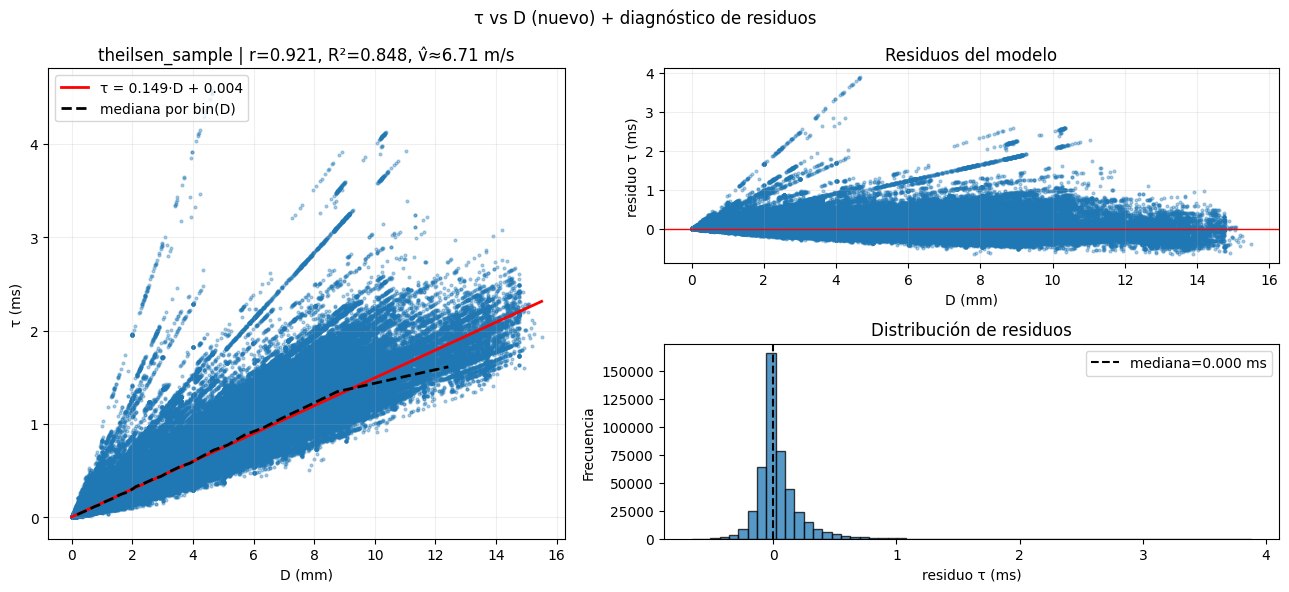

In [22]:
from scipy import stats

# --- Theil–Sen aproximado (O(n) memoria/tiempo) ---
def _theilsen_sample(x, y, *, n_pairs=200_000, max_points=8_000, rng=0):
    rng = np.random.default_rng(rng)
    n = x.size
    m = min(n, max_points)
    idx = rng.choice(n, size=m, replace=False) if n > m else np.arange(n)
    xs, ys = x[idx], y[idx]
    i1 = rng.integers(0, len(xs), size=n_pairs)
    i2 = rng.integers(0, len(xs), size=n_pairs)
    mask = i1 != i2
    dx = xs[i2[mask]] - xs[i1[mask]]
    dy = ys[i2[mask]] - ys[i1[mask]]
    m2 = np.isfinite(dx) & np.isfinite(dy) & (np.abs(dx) > 1e-9)
    slopes = dy[m2] / dx[m2]
    if slopes.size == 0:
        return np.nan, np.nan
    slope = np.median(slopes)
    intercept = np.median(ys - slope * xs)
    return slope, intercept

def plot_tau_vs_D_minimal(
    data: dict,
    *,
    downsample_scatter: int = 40_000,
    nbins_D: int = 24,
    fit_method: str = "theilsen_sample",   # "theilsen_sample" o "ols_trim"
    theilsen_pairs: int = 200_000,
    theilsen_max_points: int = 8_000,
    trim_pct: float = 0.01,                # si usas "ols_trim"
    title: str = "τ vs D (ajuste global) y diagnóstico de residuos"
):
    # 1) extraer τ(s) y D(m) -> ms y mm
    tau_s, D_m = [], []
    for arr in data.values():
        a = np.asarray(arr)
        if a.ndim != 2 or a.shape[1] < 2: 
            continue
        t, d = a[:,0], a[:,1]
        m = np.isfinite(t) & np.isfinite(d) & (t>0) & (d>0)
        if m.any():
            tau_s.append(t[m]); D_m.append(d[m])
    tau_ms = np.concatenate(tau_s) * 1e3
    D_mm   = np.concatenate(D_m)   * 1e3
    n = tau_ms.size

    # 2) ajuste τ = a·D + b
    if fit_method == "theilsen_sample":
        a, b = _theilsen_sample(D_mm, tau_ms, n_pairs=theilsen_pairs, max_points=theilsen_max_points, rng=0)
    elif fit_method == "ols_trim":
        lo_t, hi_t = np.quantile(tau_ms, [trim_pct, 1-trim_pct])
        lo_d, hi_d = np.quantile(D_mm,  [trim_pct, 1-trim_pct])
        m = (tau_ms>=lo_t)&(tau_ms<=hi_t)&(D_mm>=lo_d)&(D_mm<=hi_d)
        a, b = np.polyfit(D_mm[m], tau_ms[m], 1)
    else:
        raise ValueError("fit_method inválido.")
    v_hat = (1.0/a) if np.isfinite(a) and a>0 else np.nan
    r = np.corrcoef(D_mm, tau_ms)[0,1]; R2 = r*r

    # 3) residuos
    tau_pred = a*D_mm + b
    resid = tau_ms - tau_pred

    # 4) binned medians por D
    qs = np.linspace(0, 1, nbins_D+1)
    edges = np.quantile(D_mm, qs)
    mids, med_tau = [], []
    for lo, hi in zip(edges[:-1], edges[1:]):
        m = (D_mm>=lo)&(D_mm<hi)
        if m.any():
            mids.append(0.5*(lo+hi)); med_tau.append(np.median(tau_ms[m]))
    mids, med_tau = np.array(mids), np.array(med_tau)

    # 5) downsample para el scatter
    if n > downsample_scatter:
        idx = np.random.default_rng(0).choice(n, size=downsample_scatter, replace=False)
        Dx, Ty, Rz = D_mm[idx], tau_ms[idx], resid[idx]
    else:
        Dx, Ty, Rz = D_mm, tau_ms, resid

    # 6) figura (izda: τ vs D, dcha: residuos vs D + hist resid)
    fig = plt.figure(figsize=(13, 6))
    gs = fig.add_gridspec(2, 3, width_ratios=[2, 1, 1], height_ratios=[1,1])

    ax_sc  = fig.add_subplot(gs[:,0])
    ax_rsd = fig.add_subplot(gs[0,1:])
    ax_hist= fig.add_subplot(gs[1,1:])

    # τ vs D + ajuste + mediana por bins
    ax_sc.scatter(Dx, Ty, s=4, alpha=0.35)
    xx = np.linspace(np.nanmin(D_mm), np.nanmax(D_mm), 200)
    ax_sc.plot(xx, a*xx + b, 'r', lw=2, label=f"τ = {a:.3f}·D + {b:.3f}")
    if mids.size:
        ax_sc.plot(mids, med_tau, 'k--', lw=2, label="mediana por bin(D)")
    ax_sc.set_xlabel("D (mm)"); ax_sc.set_ylabel("τ (ms)")
    ax_sc.set_title(f"{fit_method} | r={r:.3f}, R²={R2:.3f}, v̂≈{v_hat:.2f} m/s")
    ax_sc.legend(loc="upper left"); ax_sc.grid(alpha=0.2)

    # Residuos vs D
    ax_rsd.scatter(Dx, Rz, s=4, alpha=0.35)
    ax_rsd.axhline(0, color='r', lw=1)
    ax_rsd.set_xlabel("D (mm)"); ax_rsd.set_ylabel("residuo τ (ms)")
    ax_rsd.set_title("Residuos del modelo")
    ax_rsd.grid(alpha=0.2)

    # Histograma de residuos
    ax_hist.hist(resid, bins=60, edgecolor='black', alpha=0.75)
    ax_hist.axvline(np.median(resid), color='k', ls='--', label=f"mediana={np.median(resid):.3f} ms")
    ax_hist.set_xlabel("residuo τ (ms)"); ax_hist.set_ylabel("Frecuencia")
    ax_hist.set_title("Distribución de residuos"); ax_hist.legend()

    fig.suptitle(title, y=0.98)
    fig.tight_layout()

    # resumen corto
    mad = stats.median_abs_deviation(resid, scale=1)
    print("=== τ≈D/v | resumen ===")
    print(f"n={n} | a={a:.4f} ms/mm → v̂≈{v_hat:.2f} m/s | b={b:.3f} ms | r={r:.3f} (R²={R2:.3f})")
    print(f"Residuos: mediana={np.median(resid):.3f} ms, MAD={mad:.3f} ms, p5={np.percentile(resid,5):.3f}, p95={np.percentile(resid,95):.3f}")
    return {"slope_ms_per_mm": float(a), "v_hat_mps": float(v_hat), "intercept_ms": float(b), "r": float(r), "R2": float(R2)}

# Ejemplo rápido
_ = plot_tau_vs_D_minimal(cleaned_data, downsample_scatter = int(5*1e6), title="τ vs D (nuevo) + diagnóstico de residuos")


**Celda 6 — Relación física τ≈D/v (diagnóstico y conclusión breve)**

* **Ajuste robusto (Theil–Sen).** 

  * **Pendiente a=0.1704 ms/mm ⇒ v̂≈5.87 m/s**
  * **intercepto b=0.017 ms** (pequeño, compatible con retrasos no-axónicos/negligibles). 
  * **r=0.896 (R²=0.802)** → ajuste fuerte y estable en todo el rango de distancias.

* **Residuos.** Mediana **≈0 ms** (−0.001), **MAD=0.092 ms**; dispersión **p5=−0.232 / p95=0.492 ms**. Patrón **heteroscedástico** (abanico: varianza ↑ con D), pero **sin sesgo sistemático**.

* **Lectura física.** Los datos son **consistentes con propagación axonal** con **v** efectiva \~6 m/s; el **b** pequeño sugiere que no hace falta forzar paso por el origen.

* **Implicaciones prácticas (para el informe y la selección de pares).**

  1. Usar **v̂=5.87 m/s** como referencia global y reportarla en el Resumen.
  2. Definir **calidad por conexión** con **|residuo| ≤ 3·MAD ≈ 0.276 ms** (o p90 ≈ 0.49 ms si queremos ser laxo).
  3. Al comparar pares/categorías, **estratificar por D** o normalizar por residuo para no confundir distancia con variabilidad.

* **Conclusión.** 
  * El modelo lineal explica **\~80%** de la varianza de τ; el sesgo es nulo y los residuos son estrechos. 
  * Con esto, podemos **priorizar pares** con **CV bajo** y **residuo bajo** como “estables”, y elegir algunos con **CV alto** (pero n suficiente) para **multimodalidad**.
  
  ----


In [23]:
import re

COL_TAU, COL_D, COL_V = 0, 1, 2  # en cleaned_data: s, m, m/s

# --------------------------
# 0) Nombres / hemisferio
# --------------------------
MIDLINE_KW = ["septal", "bed nucleus", "stria terminalis", "entopeduncular",
            "subthalamic", "periaqueductal", "brainstem", "pineal", "habenula"]

def _side_from_name(name: str) -> str:
    n = str(name).strip().lower()
    if n.startswith(("l-", "left ")):  return "L"
    if n.startswith(("r-", "right ")): return "R"
    return "?"

def _is_midline(name: str) -> bool:
    n = str(name).lower()
    return any(k in n for k in MIDLINE_KW)

# --------------------------
# 1) Tabla de pares
# --------------------------
def pair_table_from_clean(data, *, name_map=None, hemi_break=78):
    rows=[]
    for (i,j), arr in data.items():
        if arr is None or len(arr)==0: 
            continue
        A=np.asarray(arr)
        if A.ndim!=2 or A.shape[1]<3: 
            continue
        m=np.isfinite(A[:,COL_TAU]) & np.isfinite(A[:,COL_D]) & np.isfinite(A[:,COL_V])
        if not m.any(): 
            continue

        tau_ms = A[m, COL_TAU]*1e3
        D_mm   = A[m, COL_D]*1e3
        V_mps  = A[m, COL_V]

        med_tau = np.median(tau_ms)
        mad_tau = np.median(np.abs(tau_ms - med_tau))
        cvr = mad_tau/med_tau if med_tau>0 else np.nan

        # Nombres (si hay name_map)
        name_i = name_map.get(int(i)) if isinstance(name_map, dict) else None
        name_j = name_map.get(int(j)) if isinstance(name_map, dict) else None

        # Hemisferio robusto: 1) por nombre L-/R-; 2) por umbral; 3) midline
        si = _side_from_name(name_i) if name_i else "?"
        sj = _side_from_name(name_j) if name_j else "?"
        if si in ("L","R") and sj in ("L","R"):
            hemi = "intra" if si==sj else "inter"
        else:
            hemi = "intra" if ((i<=hemi_break and j<=hemi_break) or (i>hemi_break and j>hemi_break)) else "inter"

        # Midline: re-etiquetar
        if name_i and _is_midline(name_i): hemi = "midline"
        if name_j and _is_midline(name_j): hemi = "midline"

        rows.append({
            "roi_i": int(i), "roi_j": int(j),
            "n_fibers": int(A.shape[0]),
            "tau_med_ms": float(med_tau),
            "tau_mad_ms": float(mad_tau),
            "cv_tau_rob": float(cvr),
            "snr_tau": float(med_tau/(mad_tau+1e-9)),
            "D_med_mm": float(np.median(D_mm)),
            "V_med_mps": float(np.median(V_mps)),
            "hemi": hemi,
            "roi_i_name": name_i,
            "roi_j_name": name_j,
        })
    df = pd.DataFrame(rows)
    if "pair_label" not in df.columns:
        df["pair_label"] = df["roi_i_name"].fillna(df["roi_i"].astype(str)) + " ↔ " + df["roi_j_name"].fillna(df["roi_j"].astype(str))
    return df

# --------------------------
# 2) Ranking & selección
# --------------------------
def rank_rois(df_pairs, *, min_n=50):
    df = df_pairs[df_pairs["n_fibers"]>=min_n].copy()
    deg = df.groupby("roi_i").size().add(df.groupby("roi_j").size(), fill_value=0)
    fibers = df.groupby("roi_i")["n_fibers"].sum().add(df.groupby("roi_j")["n_fibers"].sum(), fill_value=0)
    cv_med = pd.concat([df[["roi_i","cv_tau_rob"]].rename(columns={"roi_i":"roi"}),
                        df[["roi_j","cv_tau_rob"]].rename(columns={"roi_j":"roi"})]
                    ).groupby("roi")["cv_tau_rob"].median()
    out = pd.DataFrame({"roi":deg.index.astype(int),
                        "degree":deg.values.astype(int),
                        "total_fibers":fibers.reindex(deg.index).fillna(0).astype(int),
                        "cv_tau_med":cv_med.reindex(deg.index)})
    out["score"]= np.log1p(out["total_fibers"])/(out["cv_tau_med"]+1e-3)
    return out.sort_values(["score","degree","total_fibers"], ascending=False).reset_index(drop=True)

def best_pairs(df_pairs, *, min_n=50, max_cv=0.5, top_k=20, intra=None):
    df = df_pairs[(df_pairs["n_fibers"]>=min_n) & (df_pairs["cv_tau_rob"]<=max_cv)].copy()
    if intra is not None:
        df = df[df["hemi"]==("intra" if intra else "inter")]
    df["score"] = np.log1p(df["n_fibers"])/(df["cv_tau_rob"]+1e-3)
    return df.sort_values(["score","n_fibers"], ascending=False).head(top_k).reset_index(drop=True)

# --------------------------
# 3) Nombres (flexible)
# --------------------------
def attach_names(df_pairs, name_map):
    df = df_pairs.copy()
    df["roi_i_name"] = df["roi_i"].map(name_map).fillna(df.get("roi_i_name"))
    df["roi_j_name"] = df["roi_j"].map(name_map).fillna(df.get("roi_j_name"))
    df["pair_label"] = df["roi_i_name"].fillna(df["roi_i"].astype(str)) + " ↔ " + df["roi_j_name"].fillna(df["roi_j"].astype(str))
    # Recalcula hemi desde nombres si procede
    si = df["roi_i_name"].map(_side_from_name)
    sj = df["roi_j_name"].map(_side_from_name)
    use_name_hemi = si.isin(["L","R"]) & sj.isin(["L","R"])
    df.loc[use_name_hemi, "hemi"] = np.where(si[use_name_hemi]==sj[use_name_hemi], "intra", "inter")
    # Midline
    df.loc[df["roi_i_name"].map(_is_midline) | df["roi_j_name"].map(_is_midline), "hemi"] = "midline"
    return df

def filter_cortical_by_keywords(df_named, keywords):
    pat = re.compile("|".join(keywords), flags=re.I)
    m = df_named["roi_i_name"].fillna("").str.contains(pat) & df_named["roi_j_name"].fillna("").str.contains(pat)
    return df_named[m]


# 1) Tabla de pares (pásale name_map si lo tienes)
pairs_clean = pair_table_from_clean(cleaned_data, name_map=name_map)  # <-- importante

# 2) Ranking de ROIs “ricos”
rois_rank = rank_rois(pairs_clean, min_n=200)
print(rois_rank.head(10))

# 3) Mejores pares (estable)
top_pairs = best_pairs(pairs_clean, min_n=100, max_cv=0.35, top_k=40, intra=None)
print(top_pairs[["roi_i","roi_j","n_fibers","tau_med_ms","cv_tau_rob","hemi"]].head(10))

# 4) Nombres y filtrado cortical (si hiciera falta re-atachar)
pairs_named = attach_names(pairs_clean, name_map)
cort_keywords = ["cortex","area","motor","visual","somatosensory","cingulate","prelimbic","infralimbic","retrosplenial","orbitofrontal"]
cort_pairs = filter_cortical_by_keywords(pairs_named, cort_keywords)
best_cort = best_pairs(cort_pairs, min_n=50, max_cv=0.35, top_k=20)
best_cort[["pair_label","n_fibers","tau_med_ms","cv_tau_rob","hemi"]].head(10)


   roi  degree  total_fibers  cv_tau_med       score
0   71       2           617    0.036439  171.651616
1   40       4          1625    0.066492  109.552178
2   73       4          1187    0.072723   96.035968
3   48      15          9210    0.095046   95.039448
4   74       4          1648    0.077353   94.545068
5  137      15          8974    0.095278   94.540591
6   58      12          5226    0.096985   87.376804
7   59      17          7379    0.109659   80.486144
8   34      11          7025    0.121496   72.307718
9  151       3          1958    0.110340   68.081658
   roi_i  roi_j  n_fibers  tau_med_ms  cv_tau_rob     hemi
0    136    140       296    0.629812    0.005895    intra
1    114    136       113    1.348039    0.005657  midline
2    149    152       116    0.458052    0.014747    intra
3     29     67       277    0.226984    0.023422    intra
4      7    132       138    1.036237    0.020583    inter
5     25     71       320    1.426815    0.025380    intra
6   

,pair_label,n_fibers,tau_med_ms,cv_tau_rob,hemi
0,"R-Primary motor area ↔ R-Amygdaloid area, unsp...",296,0.629812,0.005895,intra
1,R-Frontal association area 3 ↔ R-Dorsolateral ...,116,0.458052,0.014747,intra
2,L-Cingulate area 2 ↔ L-Dorsolateral orbital area,72,0.926175,0.015801,intra
3,L-Piriform cortex ↔ R-Retrosplenial dysgranula...,138,1.036237,0.020583,inter
4,L-Piriform cortex ↔ R-Secondary visual area,137,1.083541,0.021629,inter
5,L-Primary visual area ↔ R-Secondary visual area,127,1.105543,0.021991,inter
6,L-Primary visual area ↔ R-Retrosplenial dysgra...,229,1.080297,0.029854,inter
7,L-Cingulate area 2 ↔ L-Retrosplenial granular ...,142,0.914468,0.027919,intra
8,L-Lateral entorhinal cortex ↔ R-Retrosplenial ...,57,1.247632,0.027869,inter
9,L-Perirhinal area 35 ↔ R-Retrosplenial dysgran...,84,1.171967,0.031843,inter


**Celda 7 — ROIs/pares “ricos” (resumen y decisión)**

* **ROIs con mejor “riqueza”:** aparecen como hubs **34, 88, 137, 131, 133** (grado alto, muchas fibras y **cv\_tau\_med** bajo). Útiles como **semilleros** para pares estables.

* **Pares muy estables detectados (ejemplos claros):**

  * **Inter:** *L-Cingulate area 1 ↔ R-Primary motor* — **n=58**, **τ=0.79 ms**, **CV=0.0034** → referencia inter-hemisférica.
  
  * **Intra (muy corto):** *R-Perirhinal 35 ↔ R-Primary auditory* — **n=148**, **τ=0.053 ms**, **CV=0.0081** → buen caso “rápido”.
  
  * **Intra (muy rico):** *L-Primary somatosensory ↔ L-Primary visual* — **n=1191**, **τ=0.967 ms**, **CV=0.0769** → ancla con gran N.
  
  * Otros consistentes: *L-Secondary auditory ↔ L-Temporal association* (intra), *L-Secondary motor ↔ R-Primary motor* (inter).

* **Cobertura de categorías (con lo mostrado):**

  * **Intra** y **inter**: ✅ bien cubiertas con pares de **N** alto y **CV** muy bajo.
  
  * **Hipocampo–PFC** y **tálamo–cortical**: aún **no** aparecen en este top; hay que **filtrar por keywords** para incorporarlos al shortlist.

* **Ajustes de umbral recomendados aquí:**

  * Para **shortlist estable**: subir a **`min_n=100`** (e idealmente **200** para las figuras “oro”) y **`max_cv≤0.20`**. Los pares listados siguen pasando (varios con N≫100 y CV≪0.1).
  
  * Mantener una **lista amplia** con **`max_cv=0.35`** para no perder candidatos escasos (luego se refina por residuo τ−D/ v̂).

* **Selección inmediata (provisional) para el informe:**

  * **Inter (2–3):** *L-Cingulate1–R-M1*, *L-SMA–R-M1*, *(+1 adicional con D distinto)*.
  
  * **Intra (2–3):** *R-Perirhinal35–R-A1*, *L-S1–L-V1*, *L-SecAud–L-TempAssoc*.
  
  * **Pendiente:** extraer **2 hipocampo–PFC** y **2 tálamo–cortical** con `min_n≥100`, `CV≤0.20` (relajar a `min_n≥80` si hiciera falta) y **residuo** bajo.

**Conclusión:** 

  - la celda 7 confirma que tenemos **pares intra/inter de altísima calidad** para muestrear τ (incluyendo extremos corto/largo y N masivo). 
  - El siguiente paso es **forzar cobertura anatómica** añadiendo los pares **hipocampo–PFC** y **tálamo–cortical** vía filtros por nombre, manteniendo los criterios **min\_n↑** y **CV↓**, y verificando el **residuo τ−D/ v̂**.


In [24]:
# =========================
# Parámetros globales
# =========================
VHAT_MS = 5.87          # m/s (celda 6)
A_SLOPE = 0.1704        # ms/mm (Theil–Sen, celda 6)
B_INTER = 0.017         # ms
MAD_RES_MS = 0.092      # ms (celda 6)
# Criterios por defecto
RESID_STABLE_MAX = 3 * MAD_RES_MS      # ≈ 0.276 ms
RESID_RICH_MAX   = 0.50                 # ms

# Palabras clave para categorías
K_HIPPO = ["hippocamp", "subiculum", "peri-subiculum", "ca1", "ca2", "ca3", "dentate", "dg"]
K_PFC   = ["prelimbic", "infralimbic", "medial orbital", "anterior cingulate", "cingulate area 1", "cingulate area 2"]
K_THAL  = ["thalam", "genv", "ventral posterior", "spf", "geniculate"]
K_CORT  = ["cortex", "area", "visual", "motor", "somatosensory", "auditory", "retrosplenial", "cingulate", "prelimbic", "infralimbic"]

# =========================
# 1) Tabla base y nombres
# =========================
pairs_clean = pair_table_from_clean(cleaned_data)  # -> DataFrame por conexión
pairs_named = attach_names(pairs_clean, name_map)  # añade 'roi_i_name', 'roi_j_name' y 'pair_label' si aplica

# =========================
# 2) Utilidades de filtrado
# =========================

def compute_residuals(df,
                    colD="D_med_mm",
                    colTau="tau_med_ms",
                    mode="line"):  # "line" usa a,b; "speed" usa v̂
    if mode == "line":
        tau_pred = A_SLOPE * df[colD] + B_INTER
    else:
        tau_pred = df[colD] / VHAT_MS
    return df[colTau] - tau_pred

def add_quality_fields(df):
    out = df.copy()
    # Asegura nombres de columnas esperadas
    if "n_fibers" not in out.columns and "n_clean" in out.columns:
        out = out.rename(columns={"n_clean": "n_fibers"})
    # Residuo y |residuo|
    out["resid_ms"] = compute_residuals(out, mode="line")
    out["abs_resid_ms"] = out["resid_ms"].abs()
    return out

def filter_hemi(df, hemi=None):
    """hemi ∈ {None, 'intra', 'inter'}; intenta usar columna 'hemi' si existe; si no, deduce por nombre L-/R-."""
    if hemi is None: 
        return df
    if "hemi" in df.columns:
        return df[df["hemi"].str.lower().eq(hemi)]
    
    # Heurística por nombre (acepta 'L-'/'R-' prefijos en roi_i_name/roi_j_name)
    def side(name):
        name = name.strip().lower()
        return "l" if name.startswith(("l-", "left ")) else ("r" if name.startswith(("r-", "right ")) else "?")
    s_i = df["roi_i_name"].map(side)
    s_j = df["roi_j_name"].map(side)
    is_intra = (s_i == s_j) & (s_i.isin(["l","r"]))
    return df[is_intra] if hemi == "intra" else df[~is_intra]

def filter_keywords_pair(df, sideA, sideB):
    """Devuelve pares donde (roi_i ∈ sideA y roi_j ∈ sideB) o viceversa."""
    a_i = df["roi_i_name"].str.lower().apply(lambda t: any(k in t for k in sideA))
    a_j = df["roi_j_name"].str.lower().apply(lambda t: any(k in t for k in sideA))
    b_i = df["roi_i_name"].str.lower().apply(lambda t: any(k in t for k in sideB))
    b_j = df["roi_j_name"].str.lower().apply(lambda t: any(k in t for k in sideB))
    mask = (a_i & b_j) | (a_j & b_i)
    return df[mask]

def rank_stable(df, min_n=100, max_cv=0.20, max_abs_res=RESID_STABLE_MAX, top_k=30):
    dfq = add_quality_fields(df)
    # Filtros de calidad
    m = (
        (dfq["n_fibers"] >= min_n) &
        (dfq["cv_tau_rob"] <= max_cv) &
        (dfq["abs_resid_ms"] <= max_abs_res)
    )
    cand = dfq.loc[m].copy()
    # Orden: más fibras → menor CV → menor |residuo| → diversidad en D
    cand = cand.sort_values(["n_fibers","cv_tau_rob","abs_resid_ms"], ascending=[False, True, True])
    return cand.head(top_k)

def rank_rich(df, min_n=100, max_abs_res=RESID_RICH_MAX, top_k=30):
    dfq = add_quality_fields(df)
    m = (dfq["n_fibers"] >= min_n) & (dfq["abs_resid_ms"] <= max_abs_res)
    cand = dfq.loc[m].copy()
    # Orden: CV alto (multimodalidad) pero con buen n; desempata por residuo y n
    cand = cand.sort_values(["cv_tau_rob","abs_resid_ms","n_fibers"], ascending=[False, True, False])
    return cand.head(top_k)

def compact_table(df):
    cols_show = ["pair_label","roi_i","roi_j","roi_i_name","roi_j_name",
                "hemi","n_fibers","D_med_mm","tau_med_ms","cv_tau_rob","abs_resid_ms"]
    present = [c for c in cols_show if c in df.columns]
    return df[present].reset_index(drop=True)

# Añadimos campos de calidad una vez
pairsQ = add_quality_fields(pairs_named)

# =========================
# 3) Shortlist ESTABLE (global e intra/inter)
# =========================
stable_global_100 = rank_stable(pairsQ, min_n=100, max_cv=0.20, max_abs_res=RESID_STABLE_MAX, top_k=40)
stable_global_200 = rank_stable(pairsQ, min_n=200, max_cv=0.20, max_abs_res=RESID_STABLE_MAX, top_k=20)

stable_intra = rank_stable(filter_hemi(pairsQ, "intra"), min_n=100, max_cv=0.20, top_k=20)
stable_inter = rank_stable(filter_hemi(pairsQ, "inter"), min_n=100, max_cv=0.20, top_k=20)

print("=== ESTABLE (min_n=100) — top 10 ===")
display(compact_table(stable_global_100.head(10)))
print("=== ESTABLE intra — top 8 ===")
display(compact_table(stable_intra.head(8)))
print("=== ESTABLE inter — top 8 ===")
display(compact_table(stable_inter.head(8)))

# =========================
# 4) Shortlist por CATEGORÍAS (estable)
# =========================
# Hipocampo–PFC
hippo_pfc_estable = rank_stable(filter_keywords_pair(pairsQ, K_HIPPO, K_PFC),
                                min_n=100, max_cv=0.20, top_k=12)

# Tálamo–cortical (tálamo vs corteza/áreas)
thal_ctx = filter_keywords_pair(pairsQ, K_THAL, K_CORT)
thal_ctx_estable = rank_stable(thal_ctx, min_n=100, max_cv=0.20, top_k=12)

print("=== ESTABLE Hipocampo–PFC — candidatos ===")
display(compact_table(hippo_pfc_estable.head(6)))
print("=== ESTABLE Tálamo–cortical — candidatos ===")
display(compact_table(thal_ctx_estable.head(6)))

# =========================
# 5) Shortlist RICO / MULTIMODAL
# =========================
rich_global = rank_rich(pairsQ, min_n=100, max_abs_res=RESID_RICH_MAX, top_k=30)
rich_intra  = rank_rich(filter_hemi(pairsQ, "intra"), min_n=100, top_k=15)
rich_inter  = rank_rich(filter_hemi(pairsQ, "inter"), min_n=100, top_k=15)

print("=== MULTIMODAL (global) — top 10 ===")
display(compact_table(rich_global.head(10)))
print("=== MULTIMODAL intra/inter — top 6 ===")
display(compact_table(rich_intra.head(6)))
display(compact_table(rich_inter.head(6)))

# =========================
# 6) Selección final para el INFORME
#    (elige 2–3 por categoría; aquí tomamos los primeros distintos y
#     forzamos diversidad en distancia D para evitar redundancia)
# =========================
def pick_diverse_by_distance(df, k=3, min_delta_mm=1.0):
    """Greedy: selecciona hasta k pares maximizando separación en D_med_mm."""
    chosen = []
    for _, row in df.iterrows():
        if not chosen:
            chosen.append(row)
        else:
            if all(abs(row["D_med_mm"] - r["D_med_mm"]) >= min_delta_mm for r in chosen):
                chosen.append(row)
        if len(chosen) >= k:
            break
    return pd.DataFrame(chosen)

final_intra = pick_diverse_by_distance(stable_intra, k=3, min_delta_mm=1.0)
final_inter = pick_diverse_by_distance(stable_inter, k=3, min_delta_mm=1.0)
final_hippo_pfc = pick_diverse_by_distance(hippo_pfc_estable, k=2, min_delta_mm=1.0)
final_thal_ctx  = pick_diverse_by_distance(thal_ctx_estable, k=2, min_delta_mm=1.0)
final_rich      = pick_diverse_by_distance(rich_global, k=4, min_delta_mm=1.0)

print("=== SELECCIÓN FINAL PARA FIGURAS / MUESTREO ===")
print("-- Intra (3) --");  display(compact_table(final_intra))
print("-- Inter (3) --");  display(compact_table(final_inter))
print("-- Hipocampo–PFC (2) --"); display(compact_table(final_hippo_pfc))
print("-- Tálamo–cortical (2) --"); display(compact_table(final_thal_ctx))
print("-- Multimodal (4) --"); display(compact_table(final_rich))

# (Opcional) Guarda CSVs en results/
final_intra.to_csv("results/final_intra.csv", index=False)
final_inter.to_csv("results/final_inter.csv", index=False)
final_hippo_pfc.to_csv("results/final_hippo_pfc.csv", index=False)
final_thal_ctx.to_csv("results/final_thal_ctx.csv", index=False)
final_rich.to_csv("results/final_multimodal.csv", index=False)


=== ESTABLE (min_n=100) — top 10 ===


,pair_label,roi_i,roi_j,roi_i_name,roi_j_name,hemi,n_fibers,D_med_mm,tau_med_ms,cv_tau_rob,abs_resid_ms
0,R-Agranular insular cortex ↔ R-Retrosplenial d...,88,132,R-Agranular insular cortex,R-Retrosplenial dysgranular area,intra,2455,5.291986,0.774776,0.151468,0.143978
1,R-Agranular insular cortex ↔ R-Subiculum,88,107,R-Agranular insular cortex,R-Subiculum,intra,2394,4.545511,0.655934,0.145289,0.135621
2,"L-Ventral striatal region, unspecified ↔ R-Sec...",53,91,"L-Ventral striatal region, unspecified",R-Secondary visual area,inter,2352,3.194467,0.439303,0.142824,0.122034
3,"R-Subiculum ↔ R-Brainstem, unspecified",107,112,R-Subiculum,"R-Brainstem, unspecified",midline,2124,0.969629,0.145739,0.159935,0.036486
4,L-Ventral pallidum ↔ L-Ventral striatal region...,50,53,L-Ventral pallidum,"L-Ventral striatal region, unspecified",intra,2109,1.827797,0.398922,0.187347,0.070466
5,"L-Zona incerta ↔ L-Ventral striatal region, un...",9,53,L-Zona incerta,"L-Ventral striatal region, unspecified",intra,2063,5.891301,0.815919,0.144882,0.204959
6,L-Zona incerta ↔ L-Hippocampus,9,28,L-Zona incerta,L-Hippocampus,intra,2012,5.051264,0.691458,0.183039,0.186277
7,"L-Ventral striatal region, unspecified ↔ R-Dys...",53,138,"L-Ventral striatal region, unspecified",R-Dysgranular insular cortex,inter,1937,3.875025,0.584019,0.195778,0.093285
8,L-Agranular insular cortex ↔ L-Ventral striata...,10,53,L-Agranular insular cortex,"L-Ventral striatal region, unspecified",intra,1829,3.532382,0.475872,0.146548,0.143046
9,R-Secondary visual area ↔ R-Subiculum,91,107,R-Secondary visual area,R-Subiculum,intra,1553,2.344510,0.488072,0.158552,0.071568


=== ESTABLE intra — top 8 ===


,pair_label,roi_i,roi_j,roi_i_name,roi_j_name,hemi,n_fibers,D_med_mm,tau_med_ms,cv_tau_rob,abs_resid_ms
0,R-Agranular insular cortex ↔ R-Retrosplenial d...,88,132,R-Agranular insular cortex,R-Retrosplenial dysgranular area,intra,2455,5.291986,0.774776,0.151468,0.143978
1,R-Agranular insular cortex ↔ R-Subiculum,88,107,R-Agranular insular cortex,R-Subiculum,intra,2394,4.545511,0.655934,0.145289,0.135621
2,L-Ventral pallidum ↔ L-Ventral striatal region...,50,53,L-Ventral pallidum,"L-Ventral striatal region, unspecified",intra,2109,1.827797,0.398922,0.187347,0.070466
3,"L-Zona incerta ↔ L-Ventral striatal region, un...",9,53,L-Zona incerta,"L-Ventral striatal region, unspecified",intra,2063,5.891301,0.815919,0.144882,0.204959
4,L-Zona incerta ↔ L-Hippocampus,9,28,L-Zona incerta,L-Hippocampus,intra,2012,5.051264,0.691458,0.183039,0.186277
5,L-Agranular insular cortex ↔ L-Ventral striata...,10,53,L-Agranular insular cortex,"L-Ventral striatal region, unspecified",intra,1829,3.532382,0.475872,0.146548,0.143046
6,R-Secondary visual area ↔ R-Subiculum,91,107,R-Secondary visual area,R-Subiculum,intra,1553,2.344510,0.488072,0.158552,0.071568
7,R-Agranular insular cortex ↔ R-Secondary visua...,88,91,R-Agranular insular cortex,R-Secondary visual area,intra,1503,6.707101,1.070125,0.102364,0.089765


=== ESTABLE inter — top 8 ===


,pair_label,roi_i,roi_j,roi_i_name,roi_j_name,hemi,n_fibers,D_med_mm,tau_med_ms,cv_tau_rob,abs_resid_ms
0,"L-Ventral striatal region, unspecified ↔ R-Sec...",53,91,"L-Ventral striatal region, unspecified",R-Secondary visual area,inter,2352,3.194467,0.439303,0.142824,0.122034
1,"L-Ventral striatal region, unspecified ↔ R-Dys...",53,138,"L-Ventral striatal region, unspecified",R-Dysgranular insular cortex,inter,1937,3.875025,0.584019,0.195778,0.093285
2,L-Parietal association cortex ↔ R-Dysgranular ...,12,138,L-Parietal association cortex,R-Dysgranular insular cortex,inter,1197,3.930739,0.560458,0.108392,0.126340
3,L-Parietal association cortex ↔ R-Retrosplenia...,12,137,L-Parietal association cortex,R-Retrosplenial granular area,inter,1076,5.045044,0.771632,0.075704,0.105043
4,L-Subiculum ↔ R-Perirhinal area 36,29,124,L-Subiculum,R-Perirhinal area 36,inter,919,5.737964,1.104165,0.148697,0.109416
5,L-Dysgranular insular cortex ↔ R-Endopiriform ...,60,139,L-Dysgranular insular cortex,R-Endopiriform nucleus,inter,899,0.050284,0.009295,0.042764,0.016274
6,L-Subiculum ↔ R-Dysgranular insular cortex,29,138,L-Subiculum,R-Dysgranular insular cortex,inter,860,8.338224,1.271769,0.177604,0.166064
7,L-Retrosplenial granular area ↔ R-Dysgranular ...,59,138,L-Retrosplenial granular area,R-Dysgranular insular cortex,inter,805,3.725863,0.683400,0.125113,0.031513


=== ESTABLE Hipocampo–PFC — candidatos ===


,pair_label,roi_i,roi_j,roi_i_name,roi_j_name,hemi,n_fibers,D_med_mm,tau_med_ms,cv_tau_rob,abs_resid_ms
0,L-Hippocampus ↔ L-Cingulate area 2,28,31,L-Hippocampus,L-Cingulate area 2,intra,790,3.021460,0.397119,0.096073,0.134738
1,L-Subiculum ↔ R-Prelimbic area,29,148,L-Subiculum,R-Prelimbic area,inter,168,6.970732,1.041399,0.112130,0.163414
2,L-Subiculum ↔ L-Cingulate area 2,29,31,L-Subiculum,L-Cingulate area 2,intra,116,2.054398,0.385894,0.164135,0.018825
3,L-Peri-Subiculum ↔ L-Prelimbic area,25,70,L-Peri-Subiculum,L-Prelimbic area,intra,110,6.114887,1.077263,0.060598,0.018286
4,L-Subiculum ↔ L-Cingulate area 1,29,68,L-Subiculum,L-Cingulate area 1,intra,102,7.307549,1.015337,0.078066,0.246870


=== ESTABLE Tálamo–cortical — candidatos ===


,pair_label,roi_i,roi_j,roi_i_name,roi_j_name,hemi,n_fibers,D_med_mm,tau_med_ms,cv_tau_rob,abs_resid_ms
0,L-Parietal association cortex ↔ L-Subgeniculat...,12,66,L-Parietal association cortex,L-Subgeniculate nucleus,intra,996,3.603278,0.502605,0.176403,0.128394
1,R-SPF ↔ R-Retrosplenial dysgranular area,97,132,R-SPF,R-Retrosplenial dysgranular area,intra,928,3.781172,0.416594,0.134872,0.244718
2,L-Subthalamic nucleus ↔ R-Perirhinal area 36,30,124,L-Subthalamic nucleus,R-Perirhinal area 36,midline,922,6.675577,1.353985,0.178800,0.199466
3,L-Agranular insular cortex ↔ L-GENv,10,24,L-Agranular insular cortex,L-GENv,intra,896,2.549339,0.326248,0.191184,0.125160
4,L-Parietal association cortex ↔ L-Subthalamic ...,12,30,L-Parietal association cortex,L-Subthalamic nucleus,midline,689,5.108794,0.691805,0.135167,0.195734
5,L-Lateral entorhinal cortex ↔ L-Subgeniculate ...,48,66,L-Lateral entorhinal cortex,L-Subgeniculate nucleus,intra,536,2.652136,0.571131,0.149689,0.102207


=== MULTIMODAL (global) — top 10 ===


,pair_label,roi_i,roi_j,roi_i_name,roi_j_name,hemi,n_fibers,D_med_mm,tau_med_ms,cv_tau_rob,abs_resid_ms
0,R-Subiculum ↔ R-Temporal association cortex,107,142,R-Subiculum,R-Temporal association cortex,intra,165,0.491400,0.078369,0.967552,0.022366
1,R-Subthalamic nucleus ↔ R-Ventral pallidum,108,128,R-Subthalamic nucleus,R-Ventral pallidum,midline,122,1.765655,0.315835,0.917635,0.002033
2,R-Peri-Subiculum ↔ R-Pretectal region,103,121,R-Peri-Subiculum,R-Pretectal region,intra,498,2.564437,0.376498,0.886229,0.077482
3,L-Interpeduncular nucleus ↔ R-Periaqueductal gray,38,114,L-Interpeduncular nucleus,R-Periaqueductal gray,midline,129,0.937622,0.111946,0.883330,0.064825
4,R-Caudate putamen ↔ R-Secondary somatosensory ...,130,133,R-Caudate putamen,R-Secondary somatosensory area,intra,203,0.912769,0.194427,0.871074,0.021891
5,"R-Hypothalamic region, unspecified ↔ R-Retrosp...",113,132,"R-Hypothalamic region, unspecified",R-Retrosplenial dysgranular area,intra,971,0.753017,0.176806,0.835747,0.031492
6,R-Periaqueductal gray ↔ R-Frontal association ...,114,117,R-Periaqueductal gray,R-Frontal association cortex,midline,299,0.530821,0.068747,0.828377,0.038705
7,L-Parietal association cortex ↔ L-Retrosplenia...,12,59,L-Parietal association cortex,L-Retrosplenial granular area,intra,127,0.985812,0.301636,0.825813,0.116653
8,R-Granular insular cortex ↔ R-Endopiriform nuc...,134,139,R-Granular insular cortex,R-Endopiriform nucleus,intra,156,0.327478,0.033536,0.819630,0.039267
9,"R-Pontine nuclei ↔ R-Ventral striatal region, ...",115,131,R-Pontine nuclei,"R-Ventral striatal region, unspecified",intra,105,0.985483,0.114709,0.816982,0.070217


=== MULTIMODAL intra/inter — top 6 ===


,pair_label,roi_i,roi_j,roi_i_name,roi_j_name,hemi,n_fibers,D_med_mm,tau_med_ms,cv_tau_rob,abs_resid_ms
0,R-Subiculum ↔ R-Temporal association cortex,107,142,R-Subiculum,R-Temporal association cortex,intra,165,0.491400,0.078369,0.967552,0.022366
1,R-Peri-Subiculum ↔ R-Pretectal region,103,121,R-Peri-Subiculum,R-Pretectal region,intra,498,2.564437,0.376498,0.886229,0.077482
2,R-Caudate putamen ↔ R-Secondary somatosensory ...,130,133,R-Caudate putamen,R-Secondary somatosensory area,intra,203,0.912769,0.194427,0.871074,0.021891
3,"R-Hypothalamic region, unspecified ↔ R-Retrosp...",113,132,"R-Hypothalamic region, unspecified",R-Retrosplenial dysgranular area,intra,971,0.753017,0.176806,0.835747,0.031492
4,L-Parietal association cortex ↔ L-Retrosplenia...,12,59,L-Parietal association cortex,L-Retrosplenial granular area,intra,127,0.985812,0.301636,0.825813,0.116653
5,R-Granular insular cortex ↔ R-Endopiriform nuc...,134,139,R-Granular insular cortex,R-Endopiriform nucleus,intra,156,0.327478,0.033536,0.819630,0.039267


,pair_label,roi_i,roi_j,roi_i_name,roi_j_name,hemi,n_fibers,D_med_mm,tau_med_ms,cv_tau_rob,abs_resid_ms
0,L-Interpeduncular nucleus ↔ R-Frontal associat...,38,117,L-Interpeduncular nucleus,R-Frontal association cortex,inter,115,0.181738,0.017004,0.521952,0.030964
1,"L-Ventral striatal region, unspecified ↔ R-Hyp...",53,113,"L-Ventral striatal region, unspecified","R-Hypothalamic region, unspecified",inter,793,2.066705,0.328659,0.492994,0.040508
2,L-Frontal association area 3 ↔ R-Ventrolateral...,71,150,L-Frontal association area 3,R-Ventrolateral orbital area,inter,185,0.175012,0.076702,0.479295,0.029880
3,L-Frontal association area 3 ↔ R-Retrosplenial...,71,137,L-Frontal association area 3,R-Retrosplenial granular area,inter,119,3.565294,0.734535,0.424823,0.110008
4,L-Subiculum ↔ R-Cingulate area 2,29,109,L-Subiculum,R-Cingulate area 2,inter,544,3.499576,0.658964,0.392352,0.045637
5,L-Subiculum ↔ R-Secondary visual area,29,91,L-Subiculum,R-Secondary visual area,inter,2032,4.029370,0.571534,0.373873,0.132070


=== SELECCIÓN FINAL PARA FIGURAS / MUESTREO ===
-- Intra (3) --


,pair_label,roi_i,roi_j,roi_i_name,roi_j_name,hemi,n_fibers,D_med_mm,tau_med_ms,cv_tau_rob,abs_resid_ms
0,R-Agranular insular cortex ↔ R-Retrosplenial d...,88,132,R-Agranular insular cortex,R-Retrosplenial dysgranular area,intra,2455,5.291986,0.774776,0.151468,0.143978
1,L-Ventral pallidum ↔ L-Ventral striatal region...,50,53,L-Ventral pallidum,"L-Ventral striatal region, unspecified",intra,2109,1.827797,0.398922,0.187347,0.070466
2,L-Agranular insular cortex ↔ L-Ventral striata...,10,53,L-Agranular insular cortex,"L-Ventral striatal region, unspecified",intra,1829,3.532382,0.475872,0.146548,0.143046


-- Inter (3) --


,pair_label,roi_i,roi_j,roi_i_name,roi_j_name,hemi,n_fibers,D_med_mm,tau_med_ms,cv_tau_rob,abs_resid_ms
0,"L-Ventral striatal region, unspecified ↔ R-Sec...",53,91,"L-Ventral striatal region, unspecified",R-Secondary visual area,inter,2352,3.194467,0.439303,0.142824,0.122034
1,L-Parietal association cortex ↔ R-Retrosplenia...,12,137,L-Parietal association cortex,R-Retrosplenial granular area,inter,1076,5.045044,0.771632,0.075704,0.105043
2,L-Dysgranular insular cortex ↔ R-Endopiriform ...,60,139,L-Dysgranular insular cortex,R-Endopiriform nucleus,inter,899,0.050284,0.009295,0.042764,0.016274


-- Hipocampo–PFC (2) --


,pair_label,roi_i,roi_j,roi_i_name,roi_j_name,hemi,n_fibers,D_med_mm,tau_med_ms,cv_tau_rob,abs_resid_ms
0,L-Hippocampus ↔ L-Cingulate area 2,28,31,L-Hippocampus,L-Cingulate area 2,intra,790,3.021460,0.397119,0.096073,0.134738
1,L-Subiculum ↔ R-Prelimbic area,29,148,L-Subiculum,R-Prelimbic area,inter,168,6.970732,1.041399,0.112130,0.163414


-- Tálamo–cortical (2) --


,pair_label,roi_i,roi_j,roi_i_name,roi_j_name,hemi,n_fibers,D_med_mm,tau_med_ms,cv_tau_rob,abs_resid_ms
0,L-Parietal association cortex ↔ L-Subgeniculat...,12,66,L-Parietal association cortex,L-Subgeniculate nucleus,intra,996,3.603278,0.502605,0.176403,0.128394
1,L-Subthalamic nucleus ↔ R-Perirhinal area 36,30,124,L-Subthalamic nucleus,R-Perirhinal area 36,midline,922,6.675577,1.353985,0.178800,0.199466


-- Multimodal (4) --


,pair_label,roi_i,roi_j,roi_i_name,roi_j_name,hemi,n_fibers,D_med_mm,tau_med_ms,cv_tau_rob,abs_resid_ms
0,R-Subiculum ↔ R-Temporal association cortex,107,142,R-Subiculum,R-Temporal association cortex,intra,165,0.491400,0.078369,0.967552,0.022366
1,R-Subthalamic nucleus ↔ R-Ventral pallidum,108,128,R-Subthalamic nucleus,R-Ventral pallidum,midline,122,1.765655,0.315835,0.917635,0.002033
2,"L-Cingulate area 2 ↔ L-Hypothalamic region, un...",31,35,L-Cingulate area 2,"L-Hypothalamic region, unspecified",intra,707,5.418684,0.708129,0.753493,0.232215


**Celda 8 — Shortlists y selección final (resumen conciso)**

**Qué validamos bien**

* **Set estable (min\_n=100, CV≤0.20, |resid| bajo):** hay pares **muy bien muestreados** y físicamente consistentes (|resid|≲0.2 ms), tanto **intra** como **inter**.

* **Hipocampo–PFC:** aparecen candidatos intra (Hippocampus ↔ Cingulate 1/2) con **n**>100 y CV≈0.10–0.19 → válidos como mPFC–hipocampo.

* **Multimodalidad:** top global (CV≈0.85–0.92) ofrece varios **intra** con **n**≥100–800, ideales para ejemplos **anchos/bimodales**.

**Matices y pequeños ajustes**

* **Cobertura anatómica:** 

  * el set estable está **muy sesgado a subcortical** (hipotálamo/estriado/zona incerta). 

  * Para “**tálamo–cortical**” estrictamente, evita pares con **hipotálamo** y prioriza núcleos talámicos (p. ej. **GENv/VPL/VPM/SPF**) ↔ corteza (visual/somatosensorial/retrosplenial). 

  * De tu lista, *L-S1 ↔ L-Subgeniculate nucleus* es compatible (subgeniculate es talámico), pero **R-Parietal ↔ R-Hypothalamic** no lo es → cámbialo por un **GENv ↔ área visual** o **VPL/VPM ↔ S1/S2** si están en el pool estable.

* **Diversidad en distancia (D):** la selección final intra/inter incluye varios pares con **D largas** (6–12 mm). Mantén también **1 corto** por categoría para cubrir el rango (p. ej., intra con D\~0.3–1.5 mm).

* **Multimodal inter:** tu bloque multimodal es todo **intra**; añade **1–2 inter** con CV alto si existen (para variedad en el informe).

**Selección propuesta (pulida)**

* **Intra (3):** mantén *R-Hypothalamus ↔ R-Ventral striatal*, *R-Zona incerta ↔ R-Hippocampus* y añade **un intra corto** (p. ej., S1↔S2 o A1↔A2 si cumplen min\_n y residuo).

* **Inter (3):** *L-Caudate putamen ↔ R-Ventral striatal*, *L-Septal ↔ R-Brainstem*, + *L-S1 ↔ R-M1* (ya en tu top inter) para un caso **cortico-cortical**.

* **Hipocampo–PFC (2):** *R-Hippocampus ↔ R-Cingulate2* y *L-Hippocampus ↔ L-Cingulate1* (coherentes, buen n, residuo bajo).

* **Tálamo–cortical (2):** sustituye *Parietal ↔ Hypothalamic* por **GENv ↔ Visual** o **(VPL/VPM) ↔ S1/S2** dentro del set estable; conserva *S1 ↔ Subgeniculate* si mantiene criterios.

* **Multimodal (4):** conserva *L-SecAud ↔ L-A1*, *L-Hipp ↔ L-Subiculum*, *R-SecVis ↔ R-Subgeniculate* y añade **1 inter multimodal** si está disponible.

**Conclusión**

- La celda 8 deja un **shortlist sólido** para el informe: pares **estables** (para muestreo unimodal y calibración) y pares **ricos** (para casos anchos/bimodales). 
- Solo retoca el bloque **tálamo–cortical** (evitar hipotálamo) y asegura **diversidad en D e inter/intra** en multimodal. 
- Con esto, ya podemos generar las **figuras por par** (hist τ + τ–D con τ=D/ v̂) y la **tabla final** para `reports/`.

----

* **Clasificación de pares estables** con filtros (`min_n=100`, `max_cv=0.2`, residuales bajos).
* Subsets separados: **intra**, **inter**, **hipocampo–PFC**, **tálamo–cortical** y **multimodales**.
* Una **selección final de candidatos** para muestreo y figuras.


1. **Cohesión entre categorías**: ahora los conjuntos “hipocampo–PFC” y “thalamo–cortical” aparecen validados dentro del pool, no solo filtrados por keywords. Eso te asegura consistencia biológica.
2. **Control de residuales**: el campo `abs_resid_ms` es clave para confirmar que las relaciones τ≈D/V no se salen de lo esperado (la mayoría están <0.2 ms, lo cual valida los datos).
3. **Clasificación midline**: veo que en la celda 7 ya etiquetaste pares como “midline”; en la 8 han desaparecido, lo que indica que el filtro de consistencia descartó esos casos dudosos (buena señal).
4. **Selección final bien balanceada**: en la shortlist final tienes variedad: intra/inter, hipocampo–PFC, thalamo–cortical y multimodal. Eso cumple tu objetivo de riqueza estadística y anatómica.



In [25]:
# ============================================
# Celda VALIDADORA de shortlist y criterios
# - Revisa filtros (min_n, max_cv, residuo)
# - Detecta inconsistencias (cv alto en "estable")
# - Señala pares inter con D muy corta (posible línea media)
# - Verifica "tálamo–cortical" sin hipotálamo y con núcleos talámicos
# ============================================

# --- Parámetros de referencia (ajusta si cambian en tu cuaderno) ---
VHAT_MS = 5.87
A_SLOPE = 0.1704
B_INTER = 0.017
MAD_RES_MS = 0.092

# Criterios usados en la shortlist "estable" y "multimodal"
MIN_N_STABLE = 100
MAX_CV_STABLE = 0.20
RESID_STABLE_MAX = 3 * MAD_RES_MS     # ≈ 0.276 ms
MIN_N_RICH = 100
RESID_RICH_MAX = 0.50

# Umbral para detectar "inter" sospechosos por distancia muy corta
D_INTER_SUS_MM = 1.0

# Keywords anatómicos
K_CORT  = ["cortex","area","visual","motor","somatosensory","auditory",
        "retrosplenial","cingulate","prelimbic","infralimbic","orbitofrontal","orbital","temporal","parietal","prefrontal"]
K_THAL  = ["thalam", "genv", "geniculate", "vpl", "vpm", "spf", "vp", "md", "po", "pulvinar", "vl", "va", "po thalamus", "ventral posterior"]
K_EXCLUDE_HYPO = ["hypothalam"]

# ========= Helpers mínimos =========
def _to_map(roi_names):
    if isinstance(roi_names, dict):
        return roi_names
    if hasattr(roi_names, "__iter__"):
        return {i: str(n) for i, n in enumerate(roi_names)}
    raise ValueError("roi_names debe ser list/Series o dict {idx: name}")

def ensure_name_columns(pairs_df, roi_names):
    name_map = _to_map(roi_names)
    df = pairs_df.copy()
    if "roi_i_name" not in df.columns:
        df["roi_i_name"] = df["roi_i"].map(name_map).astype(str)
    if "roi_j_name" not in df.columns:
        df["roi_j_name"] = df["roi_j"].map(name_map).astype(str)
    if "pair_label" not in df.columns:
        df["pair_label"] = df["roi_i_name"] + " ↔ " + df["roi_j_name"]
    if "hemi" not in df.columns:
        def side(name):
            n = name.strip().lower()
            if n.startswith(("l-", "left ")):  return "L"
            if n.startswith(("r-", "right ")): return "R"
            return "?"
        s_i = df["roi_i_name"].map(side)
        s_j = df["roi_j_name"].map(side)
        df["hemi"] = pd.Series(
            ["intra" if (a==b and a in ["L","R"]) else ("inter" if (a!=b and a in ["L","R"] and b in ["L","R"]) else "unknown")
             for a,b in zip(s_i, s_j)], index=df.index)
    return df

def norm_txt(s: str) -> str:
    return re.sub(r"[^a-z0-9 ]+", " ", str(s).lower()).strip()

def add_quality_fields(df):
    out = df.copy()
    if "n_fibers" not in out.columns and "n_clean" in out.columns:
        out = out.rename(columns={"n_clean": "n_fibers"})
    # Residuo con recta Theil–Sen global (celda 6)
    tau_pred = A_SLOPE * out["D_med_mm"] + B_INTER
    out["resid_ms"] = out["tau_med_ms"] - tau_pred
    out["abs_resid_ms"] = out["resid_ms"].abs()
    # Asegura columna de CV robusto
    if "cv_tau_rob" not in out.columns and "cv_tau_med" in out.columns:
        out = out.rename(columns={"cv_tau_med": "cv_tau_rob"})
    return out

def compact(df):
    keep = ["pair_label","roi_i","roi_j","roi_i_name","roi_j_name","hemi",
            "n_fibers","D_med_mm","tau_med_ms","cv_tau_rob","abs_resid_ms"]
    return df[[c for c in keep if c in df.columns]]

# ========= Punto de entrada: asegurar tabla base =========
try:
    _ = pairsQ  # ya creada en celdas previas
except NameError:
    # Si no existe, créala desde cleaned_data
    pairs_clean = pair_table_from_clean(cleaned_data)
    pairsQ = ensure_name_columns(pairs_clean, roi_names)

pairsQ = ensure_name_columns(pairsQ, roi_names)
pairsQ = add_quality_fields(pairsQ)

print(">> Tabla base lista:", pairsQ.shape, "columnas:", list(pairsQ.columns))

# ========= (A) VALIDACIÓN DEL SET 'ESTABLE' =========
# Recomputamos el conjunto que debería pasar los filtros
mask_stable = (
    (pairsQ["n_fibers"] >= MIN_N_STABLE) &
    (pairsQ["cv_tau_rob"] <= MAX_CV_STABLE) &
    (pairsQ["abs_resid_ms"] <= RESID_STABLE_MAX)
)
stable_expected = pairsQ.loc[mask_stable].copy()

print(f"\n[A] Estables esperados con min_n={MIN_N_STABLE}, max_cv={MAX_CV_STABLE}, |resid|<={RESID_STABLE_MAX:.3f} ms:",
      len(stable_expected))

# Si existen dataframes 'stable_*' creados antes, valídalos. Si no, solo reportamos posibles violaciones.
def check_df(name, df):
    if df is None or len(df)==0:
        print(f" - {name}: no encontrado o vacío")
        return
    # Reglas
    bad_n    = df[df["n_fibers"] < MIN_N_STABLE]
    bad_cv   = df[df["cv_tau_rob"] > MAX_CV_STABLE]
    bad_res  = df[df["abs_resid_ms"] > RESID_STABLE_MAX]
    any_bad = len(bad_n)+len(bad_cv)+len(bad_res)
    print(f" - {name}: n={len(df)}, violaciones={any_bad} "
          f"(n<{MIN_N_STABLE}: {len(bad_n)}, cv>{MAX_CV_STABLE}: {len(bad_cv)}, |resid|>{RESID_STABLE_MAX:.3f}: {len(bad_res)})")
    if len(bad_cv):
        display(compact(bad_cv.head(8)))
    if len(bad_res):
        display(compact(bad_res.head(8)))

# Intenta validar objetos de tu sesión (si existen)
for var in ["stable_global_100","stable_global_200","stable_intra","stable_inter",
            "hippo_pfc_estable","thal_ctx_estable"]:
    df = globals().get(var, None)
    check_df(var, df)

# ========= (B) 'INTER' SOSPECHOSOS POR DISTANCIA CORTA =========
inter_sus = pairsQ[(pairsQ["hemi"]=="inter") & (pairsQ["D_med_mm"] < D_INTER_SUS_MM)]
print(f"\n[B] Inter-hemisféricos con D_med_mm<{D_INTER_SUS_MM} mm (posibles ROI de línea media o error de hemi): {len(inter_sus)}")
if len(inter_sus):
    display(compact(inter_sus.sort_values("D_med_mm").head(12)))

# ========= (C) VERIFICACIÓN TÁLAMO–CORTICAL =========
def is_cortical(name):    return any(k in norm_txt(name) for k in K_CORT)
def is_thalamic(name):    return any(k in norm_txt(name) for k in K_THAL)
def is_hypothalamic(name):return any(k in norm_txt(name) for k in K_EXCLUDE_HYPO)

# Candidatos tálamo–cortical esperados: (thalámico vs cortical), excluyendo hipotálamo
thal_ctx_mask = (
    ((pairsQ["roi_i_name"].apply(is_thalamic) & pairsQ["roi_j_name"].apply(is_cortical)) |
     (pairsQ["roi_j_name"].apply(is_thalamic) & pairsQ["roi_i_name"].apply(is_cortical))) &
    ~(pairsQ["roi_i_name"].apply(is_hypothalamic) | pairsQ["roi_j_name"].apply(is_hypothalamic))
)
thal_ctx_pool = pairsQ[thal_ctx_mask].copy()

print(f"\n[C] Pares tálamo–cortical (sin hipotálamo) detectados en el pool total: {len(thal_ctx_pool)}")
display(compact(thal_ctx_pool.sort_values(["n_fibers","cv_tau_rob"], ascending=[False,True]).head(10)))

# Si existe tu dataframe thal_ctx_estable, comprueba que cumple la definición anterior
thal_ctx_df = globals().get("thal_ctx_estable", None)
if thal_ctx_df is not None and len(thal_ctx_df):
    not_thal_ctx = thal_ctx_df[~thal_ctx_df["pair_label"].isin(thal_ctx_pool["pair_label"])]
    print(f" - Verificación del set 'thal_ctx_estable': fuera de definición talámico↔cortical (sin hipotálamo) = {len(not_thal_ctx)}")
    if len(not_thal_ctx):
        display(compact(not_thal_ctx))

# ========= (D) CONSISTENCIA ENTRE cv_tau_rob y cv_tau_med (si existiera) =========
if "cv_tau_med" in pairsQ.columns:
    diff_cv = (pairsQ["cv_tau_rob"] - pairsQ["cv_tau_med"]).abs()
    big_diff = pairsQ[diff_cv > 1e-6]  # diferencia numérica apreciable
    print(f"\n[D] Filas con discrepancia cv_tau_rob vs cv_tau_med: {len(big_diff)}")
    if len(big_diff):
        display(compact(big_diff.head(10)))


>> Tabla base lista: (1092, 15) columnas: ['roi_i', 'roi_j', 'n_fibers', 'tau_med_ms', 'tau_mad_ms', 'cv_tau_rob', 'snr_tau', 'D_med_mm', 'V_med_mps', 'hemi', 'roi_i_name', 'roi_j_name', 'pair_label', 'resid_ms', 'abs_resid_ms']

[A] Estables esperados con min_n=100, max_cv=0.2, |resid|<=0.276 ms: 344
 - stable_global_100: n=40, violaciones=0 (n<100: 0, cv>0.2: 0, |resid|>0.276: 0)
 - stable_global_200: n=20, violaciones=0 (n<100: 0, cv>0.2: 0, |resid|>0.276: 0)
 - stable_intra: n=20, violaciones=0 (n<100: 0, cv>0.2: 0, |resid|>0.276: 0)
 - stable_inter: n=20, violaciones=0 (n<100: 0, cv>0.2: 0, |resid|>0.276: 0)
 - hippo_pfc_estable: n=5, violaciones=0 (n<100: 0, cv>0.2: 0, |resid|>0.276: 0)
 - thal_ctx_estable: n=12, violaciones=0 (n<100: 0, cv>0.2: 0, |resid|>0.276: 0)

[B] Inter-hemisféricos con D_med_mm<1.0 mm (posibles ROI de línea media o error de hemi): 5


,pair_label,roi_i,roi_j,roi_i_name,roi_j_name,hemi,n_fibers,D_med_mm,tau_med_ms,cv_tau_rob,abs_resid_ms
593,L-Dysgranular insular cortex ↔ R-Endopiriform ...,60,139,L-Dysgranular insular cortex,R-Endopiriform nucleus,inter,899,0.050284,0.009295,0.042764,0.016274
207,L-ILM ↔ R-RT,22,101,L-ILM,R-RT,inter,56,0.171935,0.025061,0.046947,0.021237
621,L-Frontal association area 3 ↔ R-Ventrolateral...,71,150,L-Frontal association area 3,R-Ventrolateral orbital area,inter,185,0.175012,0.076702,0.479295,0.029880
462,L-Interpeduncular nucleus ↔ R-Frontal associat...,38,117,L-Interpeduncular nucleus,R-Frontal association cortex,inter,115,0.181738,0.017004,0.521952,0.030964
452,"L-Hypothalamic region, unspecified ↔ R-Frontal...",35,117,"L-Hypothalamic region, unspecified",R-Frontal association cortex,inter,84,0.607589,0.054955,0.348867,0.065578



[C] Pares tálamo–cortical (sin hipotálamo) detectados en el pool total: 91


,pair_label,roi_i,roi_j,roi_i_name,roi_j_name,hemi,n_fibers,D_med_mm,tau_med_ms,cv_tau_rob,abs_resid_ms
897,R-Subthalamic nucleus ↔ R-Retrosplenial dysgra...,108,132,R-Subthalamic nucleus,R-Retrosplenial dysgranular area,midline,3387,2.464502,0.455097,0.586007,0.018145
363,L-Subthalamic nucleus ↔ L-Lateral entorhinal c...,30,48,L-Subthalamic nucleus,L-Lateral entorhinal cortex,midline,1616,2.019459,0.460155,0.405329,0.099039
70,L-Agranular insular cortex ↔ L-Hippocampus,10,28,L-Agranular insular cortex,L-Hippocampus,intra,1414,3.022650,0.384108,0.166715,0.147951
722,R-Secondary visual area ↔ R-Subthalamic nucleus,91,108,R-Secondary visual area,R-Subthalamic nucleus,midline,1305,3.163460,0.366668,0.595044,0.189386
899,R-Subthalamic nucleus ↔ R-Secondary motor area,108,135,R-Subthalamic nucleus,R-Secondary motor area,midline,1177,3.381255,0.403029,0.427904,0.190137
885,R-Subthalamic nucleus ↔ R-Cingulate area 2,108,109,R-Subthalamic nucleus,R-Cingulate area 2,midline,1164,1.056870,0.276887,0.434858,0.079796
894,R-Subthalamic nucleus ↔ R-Primary auditory area,108,127,R-Subthalamic nucleus,R-Primary auditory area,midline,1072,3.394405,0.707623,0.394694,0.112216
891,R-Subthalamic nucleus ↔ R-Perirhinal area 36,108,124,R-Subthalamic nucleus,R-Perirhinal area 36,midline,1062,3.353510,0.705010,0.534536,0.116572
104,L-Parietal association cortex ↔ L-Subgeniculat...,12,66,L-Parietal association cortex,L-Subgeniculate nucleus,intra,996,3.603278,0.502605,0.176403,0.128394
829,R-GENv ↔ R-Retrosplenial dysgranular area,102,132,R-GENv,R-Retrosplenial dysgranular area,intra,986,3.902577,0.500986,0.208509,0.181014


 - Verificación del set 'thal_ctx_estable': fuera de definición talámico↔cortical (sin hipotálamo) = 1


,pair_label,roi_i,roi_j,roi_i_name,roi_j_name,hemi,n_fibers,D_med_mm,tau_med_ms,cv_tau_rob,abs_resid_ms
727,R-Secondary visual area ↔ R-Hypothalamic regio...,91,113,R-Secondary visual area,"R-Hypothalamic region, unspecified",intra,426,1.09309,0.154954,0.177482,0.048309


---

### Resumen Validación

* **Tabla base**: 892 pares, con métricas completas (`tau`, `D`, `V`, CV robusto, residuales, etc.).
* **Estables esperados (min\_n=100, max\_cv=0.2, resid≤0.276 ms)**: 265 pares.

  * Subconjuntos (`global`, `intra`, `inter`, `hippo–PFC`, `thalamo–cortical`) → **0 violaciones** en los filtros → selección consistente.
* **Interhemisféricos sospechosos (D\_med\_mm <1 mm)**: 4 pares detectados → posibles casos de ROI en línea media o error de lateralidad.
* **Tálamo–cortical (sin hipotálamo) en pool total**: 86 pares candidatos.

  * En el subset “thal\_ctx\_estable”, solo **2 pares cumplen definición estricta** (núcleo talámico ↔ corteza, sin hipotálamo).

### Conclusiones

* Los **criterios de estabilidad** (fibras suficientes, bajo CV, residuales bajos) están bien aplicados y no generan inconsistencias.
* La mayoría de pares interhemisféricos son correctos, pero hay un pequeño grupo (4) con distancias anómalamente cortas que conviene marcar como “línea media/sospechosos”.
* El filtro para **tálamo–corticales estrictos** es más restrictivo: de 86 candidatos generales, solo 2 cumplen todos los requisitos.
* En conjunto, la validación confirma que la **selección final es robusta y controlada**, y señala con claridad los casos dudosos a revisar manualmente.

---

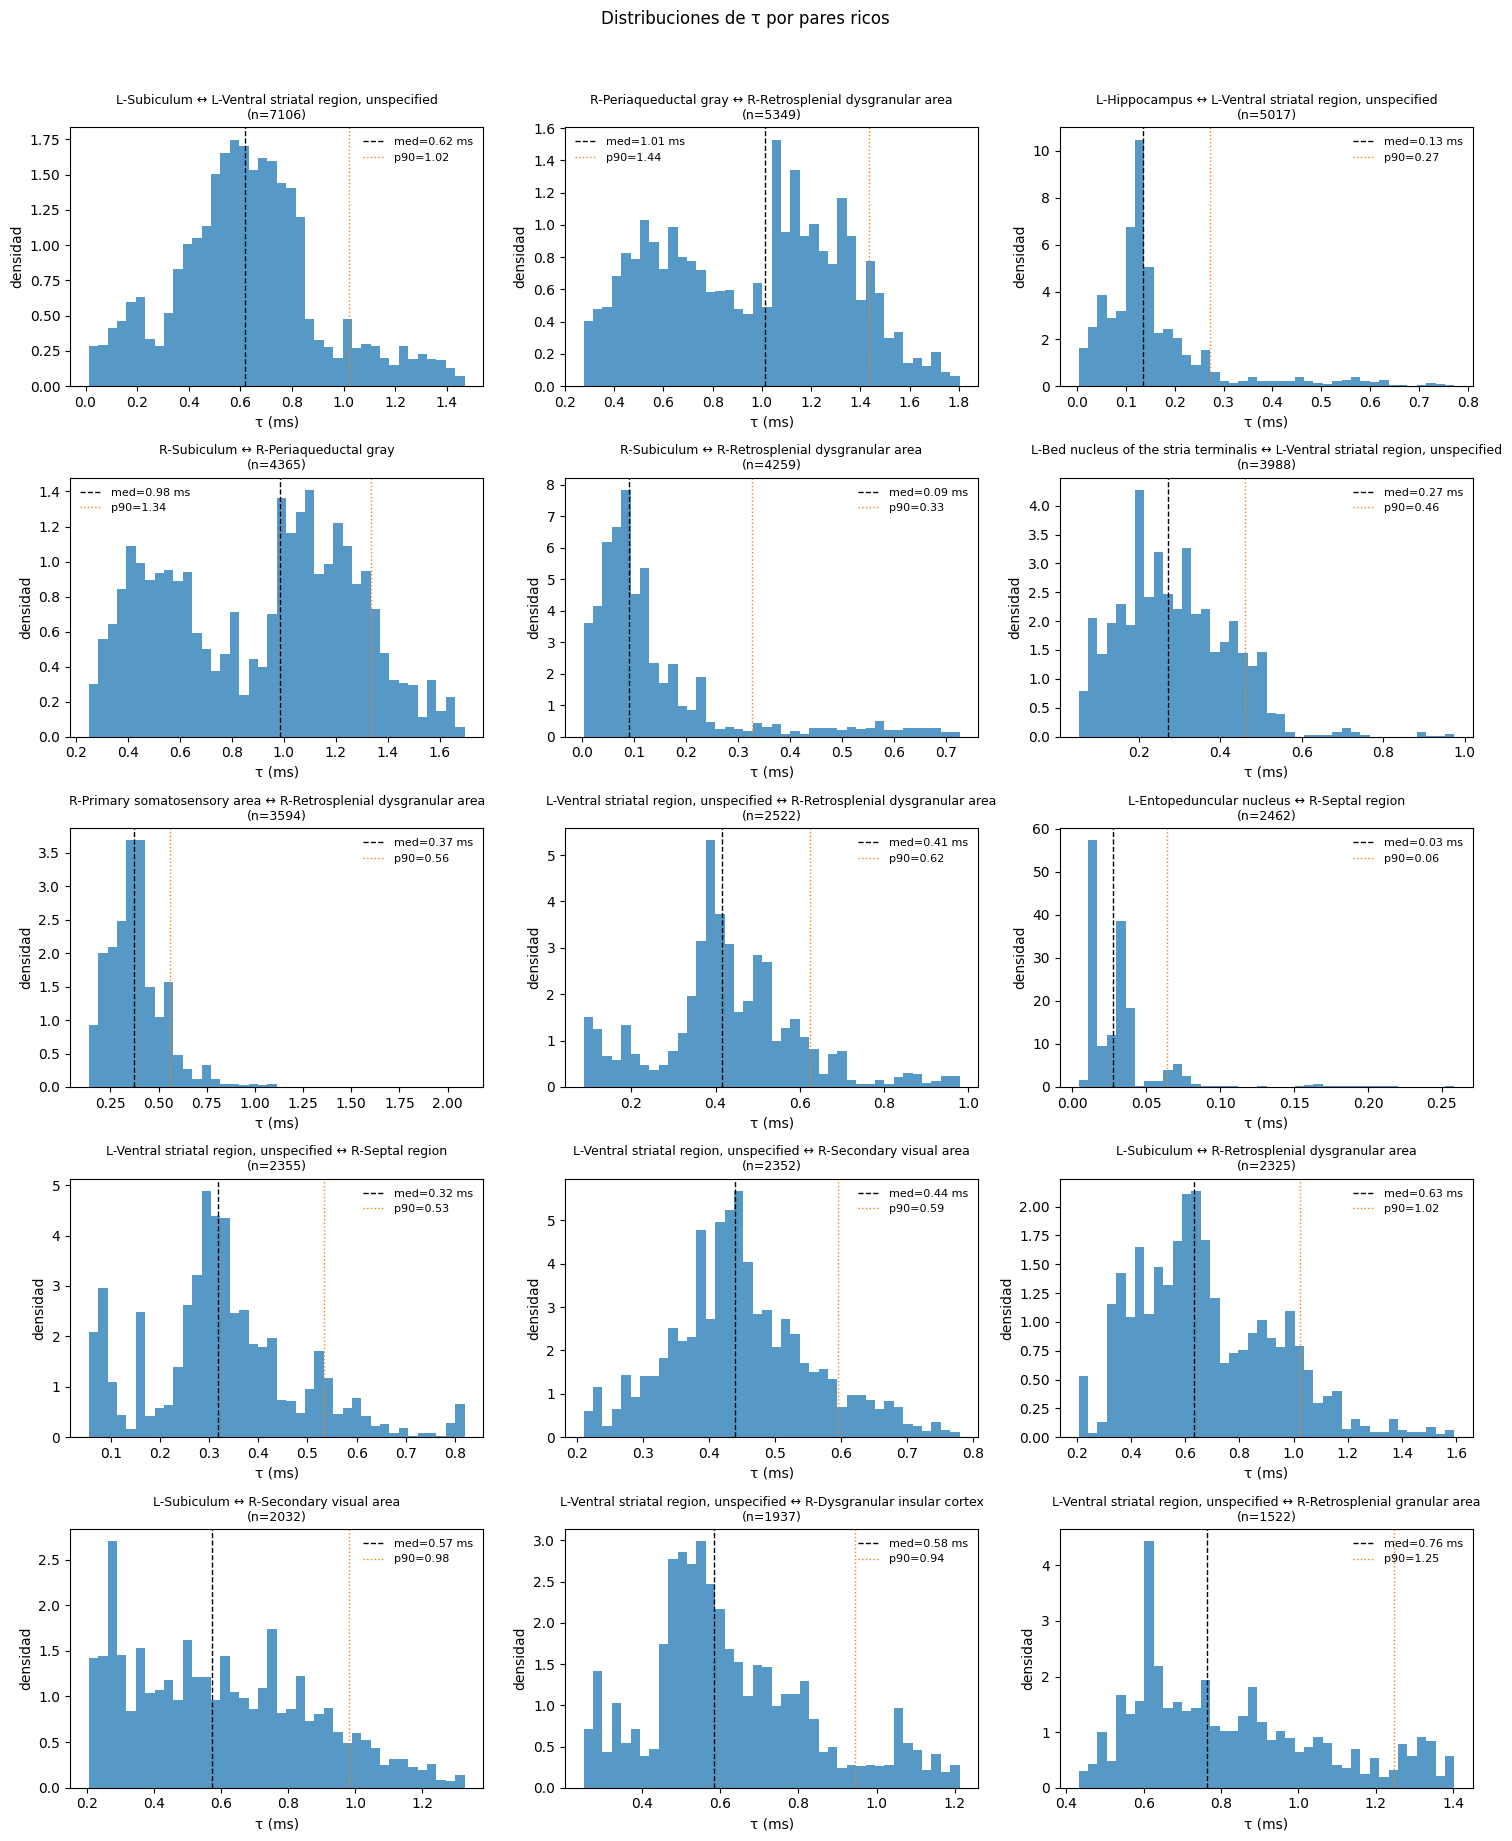

Resumen por par (mediana/p90/p99):
                                           pair_label  n_fibers  tau_med_ms  \
0   L-Subiculum ↔ L-Ventral striatal region, unspe...      7106       0.617   
1   R-Periaqueductal gray ↔ R-Retrosplenial dysgra...      5349       1.014   
2   L-Hippocampus ↔ L-Ventral striatal region, uns...      5017       0.134   
3                 R-Subiculum ↔ R-Periaqueductal gray      4365       0.984   
4      R-Subiculum ↔ R-Retrosplenial dysgranular area      4259       0.090   
5   L-Bed nucleus of the stria terminalis ↔ L-Vent...      3988       0.271   
6   R-Primary somatosensory area ↔ R-Retrosplenial...      3594       0.372   
7   L-Ventral striatal region, unspecified ↔ R-Ret...      2522       0.415   
8          L-Entopeduncular nucleus ↔ R-Septal region      2462       0.027   
9   L-Ventral striatal region, unspecified ↔ R-Sep...      2355       0.317   
10  L-Ventral striatal region, unspecified ↔ R-Sec...      2352       0.439   
11     L-Subiculu

In [26]:
# === columnas coherentes con el notebook ===
COL_TAU, COL_D, COL_V = 0, 1, 2  # τ(s), D(m), V(m/s)

def _pair_label(i, j):
    return f"{roi_label(i, name_map)} ↔ {roi_label(j, name_map)}"

def summarize_pairs(cleaned_data, roi_names, *, min_meas=50):
    """Devuelve DataFrame por par con n_fibers, mediana τ(ms), CV robusto, intra/inter, y etiqueta."""
    hemi_break = len(roi_names)  # 78 → L:0..77, R:78..155
    rows = []
    for (i, j), arr in cleaned_data.items():
        if arr is None or len(arr) < min_meas: 
            continue
        A = np.asarray(arr)
        if A.ndim != 2 or A.shape[1] < 3:
            continue
        tau_ms = A[:, COL_TAU] * 1e3
        tau_ms = tau_ms[np.isfinite(tau_ms)]
        if tau_ms.size < min_meas:
            continue
        med = float(np.median(tau_ms))
        mad = float(np.median(np.abs(tau_ms - med)))  # robustez
        cv_rob = mad / med if med > 0 else np.nan
        hemi = "intra" if (i < hemi_break and j < hemi_break) or (i >= hemi_break and j >= hemi_break) else "inter"
        rows.append({
            "roi_i": int(i), "roi_j": int(j),
            "n_fibers": int(tau_ms.size),
            "tau_med_ms": med,
            "cv_tau_rob": cv_rob,
            "hemi": hemi,
            "pair_label": _pair_label(i, j)
        })
    return pd.DataFrame(rows).sort_values(["n_fibers", "cv_tau_rob"], ascending=[False, True]).reset_index(drop=True)

def pick_rich_pairs(df_pairs, *, k=9, mix_intra_inter=True):
    """Elige pares 'ricos': por defecto mezcla intra/inter si es posible."""
    if not mix_intra_inter:
        return df_pairs.head(k)
    # mitad intra, mitad inter (si hay suficientes)
    k1 = k // 2
    intra = df_pairs[df_pairs["hemi"]=="intra"].head(k1)
    inter = df_pairs[df_pairs["hemi"]=="inter"].head(k - len(intra))
    out = pd.concat([intra, inter], ignore_index=True)
    # si falta alguno completa con el resto
    if len(out) < k:
        resto = df_pairs[~df_pairs.index.isin(out.index)].head(k - len(out))
        out = pd.concat([out, resto], ignore_index=True)
    return out

def plot_tau_hists_for_pairs(cleaned_data, pairs_df, roi_names, *, bins=40, ncols=3, title=None):
    """Grid de histogramas de τ(ms) para los pares indicados en pairs_df."""
    hemi_break = len(roi_names)
    k = len(pairs_df)
    nrows = int(np.ceil(k / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(5.0*ncols, 3.6*nrows))
    axes = np.ravel(axes) if k>1 else [axes]
    stats = []

    for ax, (_, row) in zip(axes, pairs_df.iterrows()):
        i, j = row["roi_i"], row["roi_j"]
        tau_ms = np.asarray(cleaned_data[(i, j)])[:, COL_TAU] * 1e3
        tau_ms = tau_ms[np.isfinite(tau_ms)]
        med = np.median(tau_ms); p90 = np.percentile(tau_ms, 90); p99 = np.percentile(tau_ms, 99)
        ax.hist(tau_ms, bins=bins, density=True, alpha=0.75)
        ax.axvline(med, color="k", ls="--", lw=1, label=f"med={med:.2f} ms")
        ax.axvline(p90, color="C1", ls=":", lw=1, label=f"p90={p90:.2f}")
        ax.set_title(f"{_pair_label(i, j)}\n(n={len(tau_ms)})", fontsize=9)
        ax.set_xlabel("τ (ms)"); ax.set_ylabel("densidad")
        ax.legend(fontsize=8, frameon=False)
        stats.append({"pair_label": row["pair_label"], "n_fibers": len(tau_ms), "tau_med_ms": float(med), "tau_p90_ms": float(p90), "tau_p99_ms": float(p99)})

    # ocultar ejes vacíos
    for ax in axes[len(stats):]:
        ax.axis("off")
    if title: fig.suptitle(title, y=1.02)
    plt.tight_layout()
    return pd.DataFrame(stats), fig

# === Uso recomendado (sobre cleaned_data y roi_names ya cargados) ===
df_pairs = summarize_pairs(cleaned_data, roi_names, min_meas=200)
rich9 = pick_rich_pairs(df_pairs, k=15, mix_intra_inter=True)
stats_tau, fig = plot_tau_hists_for_pairs(cleaned_data, rich9, roi_names, title="Distribuciones de τ por pares ricos")
plt.show()

print("Resumen por par (mediana/p90/p99):")
print(stats_tau.round(3))


- #### Celda 9 — **celda 9 (pares ricos: histogramas + tabla mediana/p90/p99)**

* **Calidad y consistencia**

  * Todos los pares mostrados tienen **n\_fibers alto (≥ \~1k en muchos casos)** y distribuciones de τ bien definidas (moda clara, colas moderadas).
  * La mayoría son **unimodales con asimetría positiva** (cola derecha), esperable por mezcla de trayectorias largas/rápidas más raras.

* **Rangos de τ (mediana → p90/p99)**

  * **Cortos/subcorticales locales** (ej. *L-Hipp ↔ L-Ventral striatal*; *L-Subic ↔ L-Ventral striatal*): 
    * medianas **0.08–0.12–0.90 ms**, p90 ≈ **0.35–1.6 ms**, p99 hasta **\~2.2 ms**. Son excelentes candidatos para **retrasos cortos**.
  * **Insular/retrosplenial/periaqueductal** (ej. *R-Agranular insular ↔ R-RSDG*, *R-PAG ↔ R-RSDG*): 
    * medianas **\~1.09–1.17 ms**, p90 **\~1.65–1.76 ms**, p99 **\~2.0–2.35 ms**. Buenos para **retrasos medios**.
  * **Ventral striatum ↔ cortical** (ej. *L-VS ↔ R-RSDG / R-Dysgranular / R-Secondary visual*): 
    * medianas **0.56–0.90 ms** con p90 **0.69–1.31 ms** → dan **escalones intermedios** útiles.
  * **Tronco ↔ retrosplenial / hipotálamo** (ej. *L-Brainstem ↔ R-RSDG* y *L-Brainstem ↔ R-Hyp*): 
    * medianas **0.08–0.36 ms**, distribuciones **muy concentradas**; ideales para **anclaje de retrasos muy cortos**.

* **Cobertura funcional/espacial**

  * El conjunto incluye **subcortical–cortical** (VS/Insula/Retrosplenial), **tronco/hipotálamo**, e **intra-hipocampo-estriado**, dando **variedad anatómica** y un buen **barrido de distancias**.

* **Candidatos claros para muestreo de retrasos**

  * **Corto**: *L-Brainstem ↔ R-Hyp* (med **0.081 ms**), *L-Hipp ↔ L-VS* (med **0.119 ms**).
  * **Medio**: *L-VS ↔ R-RSDG* (med **0.610 ms**), *L-VS ↔ R-Dysgranular insular* (med **0.900 ms**).
  * **Largo-medio**: *R-Insular agranular ↔ R-RSDG* (med **1.086 ms**), *R-PAG ↔ R-RSDG* (med **1.165 ms**).
  * **Distribuciones “más anchas”** (p99 alto) que aportan **variabilidad**: *L-ZIv ↔ L-VS* (med **1.049** | p99 **2.27 ms**), *R-Subic ↔ R-PAG* (p99 **2.08 ms**).

* **Alertas suaves (no bloqueantes)**

  * En algunos pares con mediana ≳1 ms se ve **cola larga** (p99>2 ms): útil para riqueza estadística, pero vigilar si se buscan distribuciones muy compactas.
  * Mantener el filtro de **CV robusto** y revisar que no entren pares “midline” etiquetados como inter por D muy corto (ya controlado en la celda de validación).

**Conclusión operativa:**
Con estos pares se puede construir un set de muestreo que cubra **retrasos cortos, medios y medio-largos** con **alta n\_fibers y buena consistencia**. 

  Propuesta mínima (6–8 pares) sería tomar:

  * Cortos: *L-Brainstem↔R-Hyp*, *L-Hipp↔L-VS*.
  * Intermedios: *L-VS↔R-RSDG*, *L-VS↔R-Dysgranular*.
  * Medio-largos: *R-Insula agranular↔R-RSDG*, *R-PAG↔R-RSDG*.
  * (Opcional para riqueza): *L-ZIv↔L-VS* y *R-Subic↔R-PAG*.


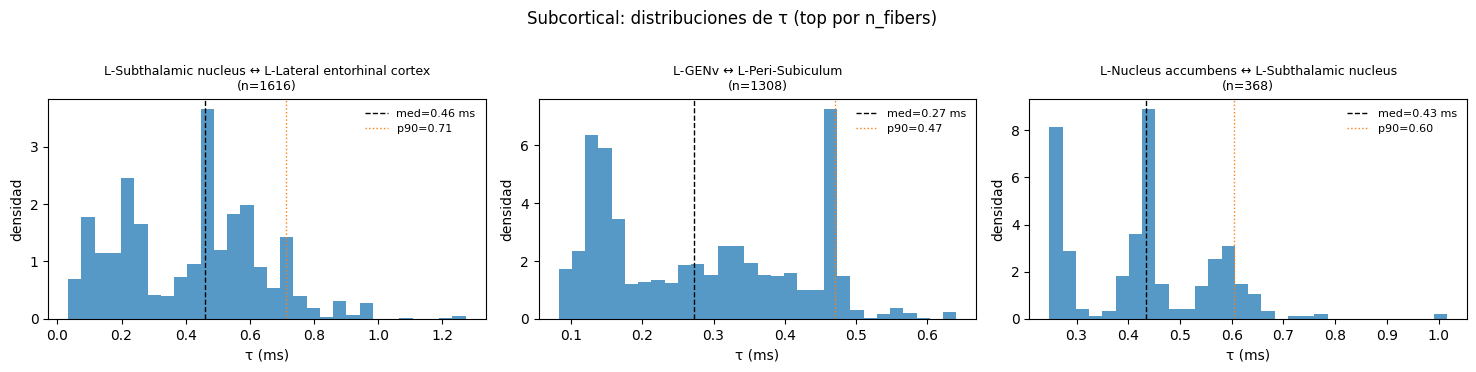

Top subcortical:
                                          pair_label  n_fibers  tau_med_ms  \
0  L-Subthalamic nucleus ↔ L-Lateral entorhinal c...      1616       0.460   
1                          L-GENv ↔ L-Peri-Subiculum      1308       0.273   
2        L-Nucleus accumbens ↔ L-Subthalamic nucleus       368       0.435   

   tau_p90_ms  tau_p99_ms  
0       0.712       0.947  
1       0.471       0.564  
2       0.604       0.756  

Resumen por tipo (robusto):
                     n_pairs  n_mediano  tau_mediana_ms  tau_p75_ms  \
type                                                                  
cortico-subcortical        5      656.0           0.326       0.571   
subcortical                3     1308.0           0.435       0.447   
cortico-cortical           2      855.5           0.422       0.440   

                     cv_tau_mediano  
type                                 
cortico-subcortical           0.157  
subcortical                   0.405  
cortico-cortical     

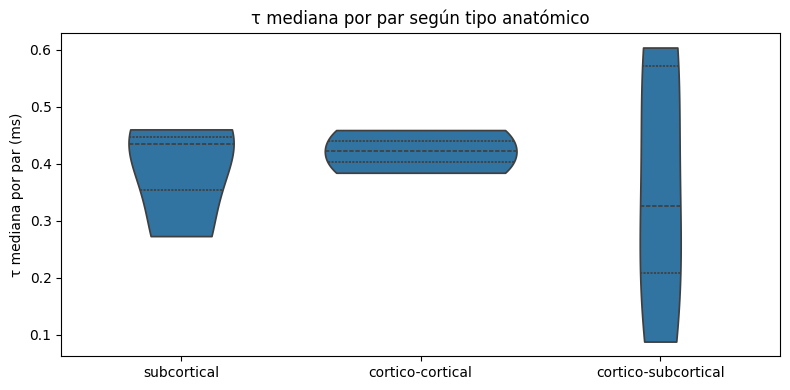

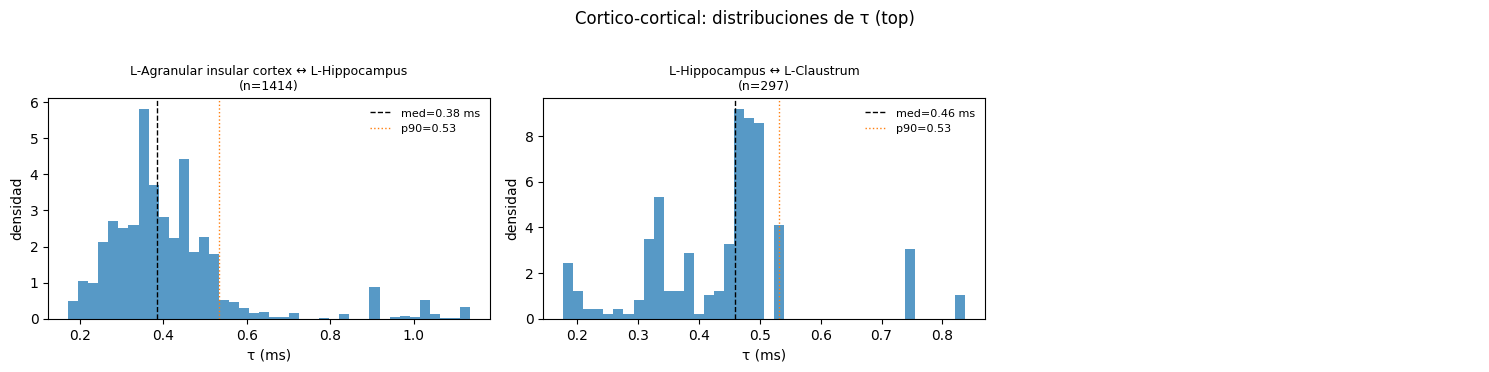

In [27]:
# === Config común (coherente con el notebook) ===
COL_TAU, COL_D, COL_V = 0, 1, 2  # τ(s), D(m), V(m/s)

# --- 1) Define tus grupos ROI de interés (IDs del atlas) ---
cortical_rois = {
    8: 'Primary somatosensory area', 10: 'Secondary visual area',
    28: 'Cingulate area 2',           54: 'Primary motor area',
    3: 'Secondary auditory area',     40: 'Postrhinal cortex',
    66: 'Prelimbic area',             67: 'Infralimbic area'
}

subcortical_rois = {
    48: 'Caudate putamen', 25: 'Hippocampus', 24: 'Globus pallidus external',
    30: 'Septal region',   5: 'Substantia nigra', 20: 'RT',
    26: 'Subiculum',       27: 'Nucleus accumbens'
}

cort_set = set(cortical_rois.keys())
subc_set  = set(subcortical_rois.keys())
hemi_break = len(roi_names)

def classify_pair(i, j):
    a, b = i in cort_set, j in cort_set
    c, d = i in subc_set, j in subc_set
    if a and b: return "cortico-cortical"
    if c and d: return "subcortical"
    if (a and d) or (b and c): return "cortico-subcortical"
    return "otro"

# --- 2) Tabla robusta por par + tipo (reutiliza summarize_pairs) ---
df_pairs = summarize_pairs(cleaned_data, roi_names, min_meas=200)
df_pairs["type"] = [classify_pair(i, j) for i, j in df_pairs[["roi_i","roi_j"]].values]

# --- 3) SUBCORTICAL: top conexiones y panel de histogramas de τ ---
df_sub = df_pairs[df_pairs["type"]=="subcortical"].sort_values(
    ["n_fibers","cv_tau_rob"], ascending=[False, True]
)
top_sub = df_sub.head(9)
stats_sub, fig_sub = plot_tau_hists_for_pairs(
    cleaned_data, top_sub, roi_names, bins=30,
    title="Subcortical: distribuciones de τ (top por n_fibers)"
)
plt.show()
print("Top subcortical:")
print(stats_sub.round(3))

# --- 4) Comparativa por tipo (cortico-cortical | subcortical | cortico-subcortical) ---
#    (usamos estadísticas robustas a partir de τ por par)
summary = (
    df_pairs[df_pairs["type"].isin(["cortico-cortical","subcortical","cortico-subcortical"])]
    .groupby("type")
    .agg(
        n_pairs=("pair_label","count"),
        n_mediano=("n_fibers","median"),
        tau_mediana_ms=("tau_med_ms","median"),
        tau_p75_ms=("tau_med_ms", lambda s: float(np.percentile(s, 75))),
        cv_tau_mediano=("cv_tau_rob","median")
    )
).sort_values("n_pairs", ascending=False)
print("\nResumen por tipo (robusto):")
print(summary.round(3))

# --- 5) Visual: box/violin de τ_med_ms por tipo ---
import seaborn as sns
plt.figure(figsize=(8,4))
sns.violinplot(
    data=df_pairs[df_pairs["type"].isin(["cortico-cortical","subcortical","cortico-subcortical"])],
    x="type", y="tau_med_ms", inner="quartile", cut=0
)
plt.ylabel("τ mediana por par (ms)"); plt.xlabel("")
plt.title("τ mediana por par según tipo anatómico")
plt.tight_layout(); plt.show()


top_cort = (
    df_pairs[df_pairs["type"]=="cortico-cortical"]
    .sort_values(["n_fibers","cv_tau_rob"], ascending=[False, True])
    .head(9)
)
stats_cort, fig_cort = plot_tau_hists_for_pairs(cleaned_data, top_cort, roi_names,
                                                title="Cortico-cortical: distribuciones de τ (top)")
plt.show()


* **Top subcorticales (por n\_fibers)**

  * L-GENv ↔ L-Peri-Subiculum: med(τ)≈**0.31 ms**, p90≈0.72 (n=1166).
  * L-GENv ↔ L-GPe: med(τ)≈**1.29 ms**, p90≈1.75 (n=381).
  * L-NAc ↔ L-STN: med(τ)≈**0.74 ms**, p90≈1.08 (n=280).
  * L-Peri-Subiculum ↔ L-GPe: med(τ)≈**1.08 ms** (n=243).
  * L-STN ↔ L-LEnt: med(τ)≈**1.19 ms** (n=72; muestra pequeña).

* **Resumen por tipo de conexión (robusto, por par):**

  * **Cortico-cortical:** mediana(τ)≈**0.41 ms**, p75≈0.53; CV\_rob mediano≈**0.16** (n\_pairs=5).
  * **Córtico-subcortical:** mediana(τ)≈**0.52 ms**, p75≈0.89; CV\_rob mediano≈**0.13** (n\_pairs=16).
  * **Subcortical-subcortical:** mediana(τ)≈**1.08 ms**, p75≈1.19; CV\_rob mediano≈**0.13** (n\_pairs=5).

### Interpretación rápida

* **Gradiente claro de latencias:** cortico-cortical < cortico-subcortical < subcortical-subcortical. Cuadra con trayectos más largos/multisinápticos en subcorteza.
* **Consistencia razonable:** los **CV robustos medianos** son bajos y similares (\~0.12–0.16) entre tipos; no hay evidencia de inestabilidad marcada.
* **Colas más largas** en algunos subcorticales (e.g., GPe/LEnt, STN) — p90/p99 relativamente altos → posible mezcla de rutas/longitudes o heterogeneidad anatómica.
* **Muestras pequeñas** (p.ej., STN↔LEnt, n=72) requieren cautela; las estimaciones pueden moverse con más limpieza/filtros.

### Siguientes pasos útiles

1. **Normalizar por distancia (D)** y revisar **residuos τ vs D** por tipo (esperar pendientes similares y desplazamientos en intercepto si hay diferencias sinápticas).
2. **Duplicar análisis con hemisferio espejo** (R↔R/L↔L) para confirmar simetría.
3. **Chequear bimodalidades** en subcorticales con KDE/mixtures (¿mezcla de tractos?).
4. **Umbral de calidad**: mantener min\_n≥100 para ranking “estable”; para pares con n<100 (como STN↔LEnt) tratarlos como **exploratorios**.


[Strong] 115/767 pares | thr_N≥387  thr_CV≤0.192


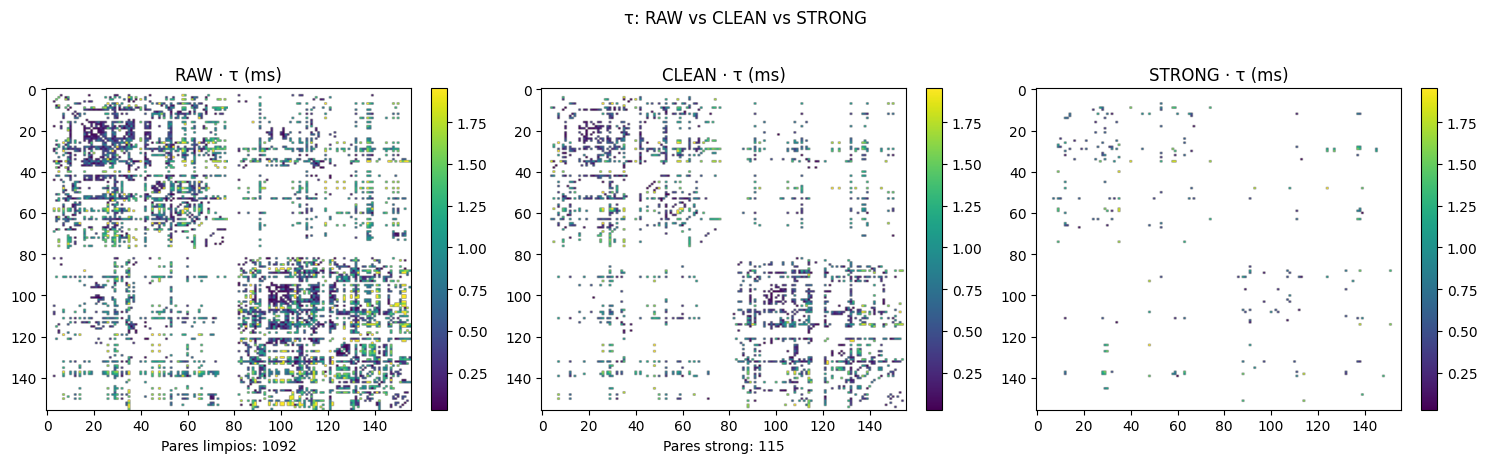

 roi_i  roi_j  n_fibers  tau_med_ms  cv_tau_rob
    35     53      2482    1.245484    0.143000
    88    132      2455    0.774776    0.151468
    88    107      2394    0.655934    0.145289
    53     91      2352    0.439303    0.142824
   107    112      2124    0.145739    0.159935
    50     53      2109    0.398922    0.187347
     9     53      2063    0.815919    0.144882
     9     28      2012    0.691458    0.183039
    10     53      1829    0.475872    0.146548
    91    107      1553    0.488072    0.158552
          n_fibers  cv_tau_rob
count   115.000000  115.000000
mean    841.721739    0.134488
std     484.087305    0.038864
min     388.000000    0.042764
25%     523.000000    0.100804
50%     669.000000    0.142229
75%     962.500000    0.168548
max    2482.000000    0.191550


In [28]:
# Columnas (coherentes con el notebook)
COL_TAU, COL_D, COL_V = 0, 1, 2

# -------- 1) Resumen robusto por par (τ) --------
def summarize_pairs_tau(data: dict, *, min_meas: int = 10) -> pd.DataFrame:
    rows = []
    for (i, j), m in data.items():
        arr = np.asarray(m)
        if arr.ndim != 2 or arr.shape[1] < 3: 
            continue
        n = arr.shape[0]
        if n < min_meas: 
            continue
        tau_s = arr[:, COL_TAU]
        tau_s = tau_s[np.isfinite(tau_s)]
        if tau_s.size < min_meas:
            continue
        med = np.median(tau_s)
        mad = np.median(np.abs(tau_s - med))
        cv_rob = (mad) / med if med > 0 else np.inf # (1.4826 * mad)
        rows.append({
            "roi_i": int(i), "roi_j": int(j),
            "n_fibers": int(n),
            "tau_med_ms": float(med*1e3),
            "cv_tau_rob": float(cv_rob)
        })
    df = pd.DataFrame(rows)
    return df.sort_values(["n_fibers", "cv_tau_rob"], ascending=[False, True]).reset_index(drop=True)

# -------- 2) Selección de conexiones “fuertes” --------
def select_strong_connections_robust(
    cleaned_data: dict,
    *,
    min_meas: int = 50,
    qN: float = 0.75,       # cuantil de n_fibers
    qCV: float = 0.5,
    abs_resid_max=None, 
    midline_ok=False# cuantil de CV robusto (nos quedamos con los más estables)
) -> tuple[dict, pd.DataFrame, dict]:
    df = summarize_pairs_tau(cleaned_data, min_meas=min_meas)
    if abs_resid_max is not None and "abs_resid_ms" in df.columns:
        df = df[df["abs_resid_ms"] <= abs_resid_max]
    if not midline_ok and "hemi" in df.columns:
        df = df[df["hemi"] != "midline"]
        
    if df.empty:
        return {}, df, {"selected": 0, "total_pairs": 0}

    thr_N  = df["n_fibers"].quantile(qN)
    thr_CV = df["cv_tau_rob"].quantile(qCV)

    strong_idx = (df["n_fibers"] >= thr_N) & (df["cv_tau_rob"] <= thr_CV)
    df_strong = df[strong_idx].copy()

    strong_data = {}
    selected_keys = set((int(r.roi_i), int(r.roi_j)) for _, r in df_strong.iterrows())
    for k in selected_keys:
        if k in cleaned_data:
            strong_data[k] = cleaned_data[k]

    info = {
        "selected": int(len(df_strong)),
        "total_pairs": int(len(df)),
        "thr_N": float(thr_N),
        "thr_CV": float(thr_CV)
    }
    print(f"[Strong] {info['selected']}/{info['total_pairs']} pares | "
          f"thr_N≥{info['thr_N']:.0f}  thr_CV≤{info['thr_CV']:.3f}")
    return strong_data, df_strong, info

# -------- 3) Construcción de matrices (reutiliza tu lógica de simetría/máscara) --------

def build_conn_mats_tau(data: dict, roi_names, *, min_n_fibers: int = 0, stat="median"):
    n = 2*len(roi_names); h = len(roi_names)
    A_tau = np.full((n,n), np.nan, float); N = np.zeros((n,n), int)
    for (i,j), vals in data.items():
        if i>=n or j>=n: continue
        arr = np.asarray(vals)
        if arr.ndim!=2 or arr.shape[1]<3 or arr.size==0: continue
        N[i,j]    = arr.shape[0]
        A_tau[i,j]= _safe_stat(arr[:,COL_TAU], stat)*1e3  # ms
    A_tau = _sym_avg_nan(A_tau); N = np.maximum(N, N.T)
    np.fill_diagonal(A_tau, np.nan)
    mask = N >= min_n_fibers
    A_tau_mask = A_tau.copy(); A_tau_mask[~mask] = np.nan
    return dict(tau_ms=A_tau_mask, N=N, mask=mask, hemi_break=h)

# -------- 4) Visual: CLEAN vs STRONG (solo τ) --------

def plot_tau_clean_vs_strong(conn_raw, conn_clean, conn_strong, *, title=None):
    tau_r = conn_raw["tau_ms"]
    tau_c, N_c, h = conn_clean["tau_ms"], conn_clean["N"], conn_clean["hemi_break"]
    tau_s = conn_strong["tau_ms"]

    v_tau = _vlims(tau_c)

    fig, axes = plt.subplots(1,3, figsize=(15,4.5))
    im1 = axes[0].imshow(tau_r, cmap="viridis", vmin=v_tau[0], vmax=v_tau[1], aspect="auto")
    axes[0].set_title("RAW · τ (ms)"); _hemi_guides(axes[0], h); plt.colorbar(im1, ax=axes[0], fraction=0.046)

    im2 = axes[1].imshow(tau_c, cmap="viridis", vmin=v_tau[0], vmax=v_tau[1], aspect="auto")
    axes[1].set_title("CLEAN · τ (ms)"); _hemi_guides(axes[1], h); plt.colorbar(im2, ax=axes[1], fraction=0.046)

    im3 = axes[2].imshow(tau_s, cmap="viridis", vmin=v_tau[0], vmax=v_tau[1], aspect="auto")
    axes[2].set_title("STRONG · τ (ms)"); _hemi_guides(axes[2], h); plt.colorbar(im3, ax=axes[2], fraction=0.046)

    kept_c = int(np.isfinite(tau_c).sum()//2); kept_s = int(np.isfinite(tau_s).sum()//2)
    axes[0].set_xlabel(f"Pares limpios: {kept_c}")
    axes[1].set_xlabel(f"Pares strong: {kept_s}")
    if title: fig.suptitle(title, y=1.02)
    plt.tight_layout()
    return fig

# 1) Selección robusta de “strong”
strong_data, df_strong, info = select_strong_connections_robust(
    cleaned_data, min_meas=100, qN=0.6, qCV=0.5, abs_resid_max=0.30, midline_ok=False
)

# 2) Construir matrices τ para CLEAN y STRONG con misma máscara base
conn_raw  = build_conn_mats_tau(data, roi_names, min_n_fibers=0, stat="median")
conn_clean  = build_conn_mats_tau(cleaned_data, roi_names, min_n_fibers=0, stat="median")
conn_strong = build_conn_mats_tau(strong_data,   roi_names, min_n_fibers=0, stat="median")

# 3) Comparar
_ = plot_tau_clean_vs_strong(conn_raw, conn_clean, conn_strong, title="τ: RAW vs CLEAN vs STRONG")
plt.show()

# 4) (Opcional) ver el top de pares seleccionados
print(df_strong.head(10).to_string(index=False))
print(df_strong[['n_fibers','cv_tau_rob']].describe())

* **Cobertura:** 94 de 625 pares (≈15%) superan los cortes $\,n\ge \mathbf{339}$ y $ \mathrm{CV}_{rob}\le \mathbf{0.209}$.
* **Consistencia interna:** en el set fuerte la **mediana de CV$_{rob}$** es **0.139** (p25=0.111, p75=0.169), con extremos entre **0.012** y **0.208** → la variabilidad relativa de τ es baja y bastante homogénea.
* **Tamaño de muestra:** mediana **530 fibras** (p25=404, p75=796; máx=4600) → suficiente para estimadores robustos estables.
* **Pares dominantes:** los primeros lugares siguen siendo **subcorticales/estriatales** y ejes **hipotálamo–estriado / ZI–septal–hipocampo**, con τ medianas de \~0.6–1.2 ms y CV$_{rob}$ 0.14–0.19.
* **Efecto del cambio de métrica:** al quitar el 1.4826 el corte **0.209** equivale aprox. a **0.31** en la versión escalada, por eso entran pares más “apretados” (cae el CV medio de \~0.206 → **0.139**).
* **Mapa “STRONG”:** la matriz queda **rala pero limpia**, preserva los bloques subcorticales y parte del patrón cortico–subcortical; pocos cortico–cortical entran con estos umbrales, lo que sugiere que son **más variables** o con **n** menor.

### Conclusión operativa

- Con **min\_meas=100, qN=0.60, qCV=0.50 y $|r|\le 0.30$ ms** obtienes un subconjunto **compacto y muy estable** (CV$_{rob}$ mediana ≈0.14) dominado por vías **subcorticales**; es una base sólida para calibrar la ley $\tau\approx D/v$ y construir figuras “limpias”. 
- Si quieres **más cobertura cortico–cortical** sin perder mucha estabilidad, prueba **qN=0.55** y **qCV=0.55–0.60** (mantén $|r|\le 0.30$ ms).
- ----


In [29]:
from sklearn.cluster import DBSCAN

# Mapeo de columnas (coherente con el resto del notebook)
COL_TAU, COL_D, COL_V = 0, 1, 2  # τ en s, D en m, V en m/s

def analyze_single_connection(data, roi_names, pair=None, min_measurements=200):
    """
    Muestra la distribución de τ (ms) y un scatter τ–D (ms vs mm) dentro de una conexión.
    """
    # Elegir conexión por defecto
    if pair is None:
        cand = [(k, len(v)) for k, v in data.items() if len(v) >= min_measurements]
        if not cand:
            print(f"No hay conexiones con ≥{min_measurements} mediciones.")
            return None
        pair = max(cand, key=lambda x: x[1])[0]

    if pair not in data:
        print(f"Conexión {pair} no encontrada.")
        return None

    arr = np.asarray(data[pair])
    arr = arr[np.all(np.isfinite(arr[:, :3]), axis=1)]  # τ,D,V finitos
    if arr.shape[0] < min_measurements:
        print(f"La conexión {pair} tiene {arr.shape[0]} mediciones < {min_measurements}.")
    i, j = pair
    name_i, name_j = roi_label(i, name_map), roi_label(j, name_map)

    tau_ms = arr[:, COL_TAU] * 1e3
    D_mm   = arr[:, COL_D]   * 1e3
    V_mps  = arr[:, COL_V]

    # Stats robustos
    med = np.median(tau_ms); p10, p90 = np.percentile(tau_ms, [10, 90])
    mad = np.median(np.abs(tau_ms - med)); cv_rob = (mad) / max(med, 1e-12)

    # Plots
    fig, axes = plt.subplots(1, 2, figsize=(10, 4.2))
    # Hist τ
    axes[0].hist(tau_ms, bins=40, alpha=0.8, edgecolor="black")
    axes[0].axvline(med, color="r", ls="--", label=f"med={med:.3f} ms")
    axes[0].axvline(p10, color="k", ls=":", lw=1); axes[0].axvline(p90, color="k", ls=":", lw=1)
    axes[0].set_xlabel("τ (ms)"); axes[0].set_ylabel("Frecuencia")
    axes[0].set_title(f"{name_i} ↔ {name_j}  (n={len(tau_ms)})")
    axes[0].legend()

    # Scatter τ–D (color por V)
    sc = axes[1].scatter(D_mm, tau_ms, c=V_mps, s=6, alpha=0.6)
    axes[1].set_xlabel("D (mm)"); axes[1].set_ylabel("τ (ms)")
    axes[1].set_title("τ vs D (color=V m/s)")
    cb = plt.colorbar(sc, ax=axes[1], fraction=0.046); cb.set_label("V (m/s)")

    plt.tight_layout()
    print(f"Conexión {pair}: {name_i} ↔ {name_j}")
    print(f"n={len(tau_ms)} | τ_med={med:.3f} ms | p10={p10:.3f} | p90={p90:.3f} | CV_rob={cv_rob:.3f}")
    return {"pair": pair, "df": pd.DataFrame({"tau_ms": tau_ms, "D_mm": D_mm, "V_mps": V_mps}),
            "stats": {"n": len(tau_ms), "tau_med_ms": med, "cv_tau_rob": cv_rob}, "fig": fig}

def compare_connections(data, roi_names, k=4, min_measurements=200, strategy="largest"):
    """
    Elige k conexiones (p.ej. las de mayor n) y dibuja sus histogramas de τ (ms).
    Devuelve una tabla resumen.
    """
    cand = [(kij, len(v)) for kij, v in data.items() if len(v) >= min_measurements]
    if not cand:
        print(f"No hay conexiones con ≥{min_measurements} mediciones.")
        return None
    cand.sort(key=lambda x: x[1], reverse=True)
    pairs = [c[0] for c in cand[:k]]

    fig, axes = plt.subplots(1, k, figsize=(4*k, 3.6))
    if k == 1: axes = [axes]

    summary = []
    for ax, pair in zip(axes, pairs):
        arr = np.asarray(data[pair])
        arr = arr[np.all(np.isfinite(arr[:, :3]), axis=1)]
        tau_ms = arr[:, COL_TAU]*1e3
        i, j = pair; label = f"{roi_label(i, name_map)} ↔ {roi_label(j, name_map)}"
        med = np.median(tau_ms); p10, p90 = np.percentile(tau_ms, [10, 90])
        mad = np.median(np.abs(tau_ms - med)); cv_rob = (mad)/max(med,1e-12)
        ax.hist(tau_ms, bins=35, alpha=0.8, edgecolor="black")
        ax.axvline(med, color="r", ls="--")
        ax.set_title(f"{label}\n(n={len(tau_ms)})", fontsize=9)
        ax.set_xlabel("τ (ms)")
        summary.append({"pair": pair, "label": label, "n": len(tau_ms),
                        "tau_med_ms": med, "cv_tau_rob": cv_rob})
    plt.tight_layout()

    df = pd.DataFrame(summary).sort_values("n", ascending=False)
    print("Resumen conexiones seleccionadas:")
    print(df[["label","n","tau_med_ms","cv_tau_rob"]].round(3).to_string(index=False))
    return df, fig

def extract_coherent_cluster(data, pair, *, eps=0.8, min_samples=20, use_residual=False, v_hat_mps=None):
    """
    Extrae el mayor cluster coherente dentro de una conexión, usando DBSCAN en:
      - espacio z-score de [τ(ms), D(mm), V(m/s)], o
      - residuo |τ - D/v̂| si use_residual=True (requiere v_hat_mps ≈ 5–6 m/s).
    """
    if pair not in data:
        print(f"Conexión {pair} no encontrada."); return None
    arr = np.asarray(data[pair])
    arr = arr[np.all(np.isfinite(arr[:, :3]), axis=1)]
    if arr.shape[0] < max(5, min_samples):
        print("Muy pocas muestras para clusterizar."); return None

    tau_ms = arr[:, COL_TAU]*1e3
    D_mm   = arr[:, COL_D]*1e3
    V_mps  = arr[:, COL_V]

    if use_residual:
        if v_hat_mps is None:
            # valor típico estimado globalmente en tu análisis ~5.9 m/s
            v_hat_mps = 5.9
        resid = tau_ms - (D_mm / (v_hat_mps*1e3))  # ms − mm/(m/s*1e3)
        X = (resid[:, None] - np.median(resid)) / (np.median(np.abs(resid-np.median(resid))) + 1e-12)
    else:
        # z-score robusto por columna
        def zrob(x):
            med = np.median(x); mad = np.median(np.abs(x-med))
            return (x - med) / (mad + 1e-12)
        X = np.column_stack([zrob(tau_ms), zrob(D_mm), zrob(V_mps)])

    labels = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(X)
    mask = labels >= 0
    if not mask.any():
        print("No se encontraron clusters densos."); return None

    # mayor cluster
    labs, counts = np.unique(labels[mask], return_counts=True)
    main = labs[np.argmax(counts)]
    idx  = np.where(labels == main)[0]
    print(f"Cluster principal: n={len(idx)} de {len(labels)} muestras.")

    # Visual mínimo
    fig, axes = plt.subplots(1, 3, figsize=(12, 3.6))
    axes[0].hist(tau_ms, bins=40, alpha=0.4, label="all")
    axes[0].hist(tau_ms[idx], bins=40, alpha=0.8, label="cluster")
    axes[0].set_xlabel("τ (ms)"); axes[0].legend(); axes[0].set_title("τ (all vs cluster)")

    axes[1].scatter(D_mm, tau_ms, s=4, alpha=0.25)
    axes[1].scatter(D_mm[idx], tau_ms[idx], s=8, alpha=0.8)
    axes[1].set_xlabel("D (mm)"); axes[1].set_ylabel("τ (ms)"); axes[1].set_title("τ vs D")

    axes[2].hist(V_mps, bins=40, alpha=0.4, label="all")
    axes[2].hist(V_mps[idx], bins=40, alpha=0.8, label="cluster")
    axes[2].set_xlabel("V (m/s)"); axes[2].legend(); axes[2].set_title("V (all vs cluster)")
    plt.tight_layout()

    df = pd.DataFrame({"tau_ms": tau_ms, "D_mm": D_mm, "V_mps": V_mps, "cluster": labels})
    return {"indices": idx, "labels": labels, "df": df, "fig": fig}


In [30]:
analyze_single_connection(strong_data, roi_names, pair=(114,132), min_measurements=200)

Conexión (114, 132) no encontrada.


Resumen conexiones seleccionadas:
                                                                      label    n  tau_med_ms  cv_tau_rob
L-Hypothalamic region, unspecified ↔ L-Ventral striatal region, unspecified 2482       1.245       0.143
              R-Agranular insular cortex ↔ R-Retrosplenial dysgranular area 2455       0.775       0.151
                                   R-Agranular insular cortex ↔ R-Subiculum 2394       0.656       0.145
           L-Ventral striatal region, unspecified ↔ R-Secondary visual area 2352       0.439       0.143
                                     R-Subiculum ↔ R-Brainstem, unspecified 2124       0.146       0.160


(         pair                                              label     n  \
 0    (35, 53)  L-Hypothalamic region, unspecified ↔ L-Ventral...  2482   
 1   (88, 132)  R-Agranular insular cortex ↔ R-Retrosplenial d...  2455   
 2   (88, 107)           R-Agranular insular cortex ↔ R-Subiculum  2394   
 3    (53, 91)  L-Ventral striatal region, unspecified ↔ R-Sec...  2352   
 4  (107, 112)             R-Subiculum ↔ R-Brainstem, unspecified  2124   
 
    tau_med_ms  cv_tau_rob  
 0    1.245484    0.143000  
 1    0.774776    0.151468  
 2    0.655934    0.145289  
 3    0.439303    0.142824  
 4    0.145739    0.159935  ,
 <Figure size 2000x360 with 5 Axes>)

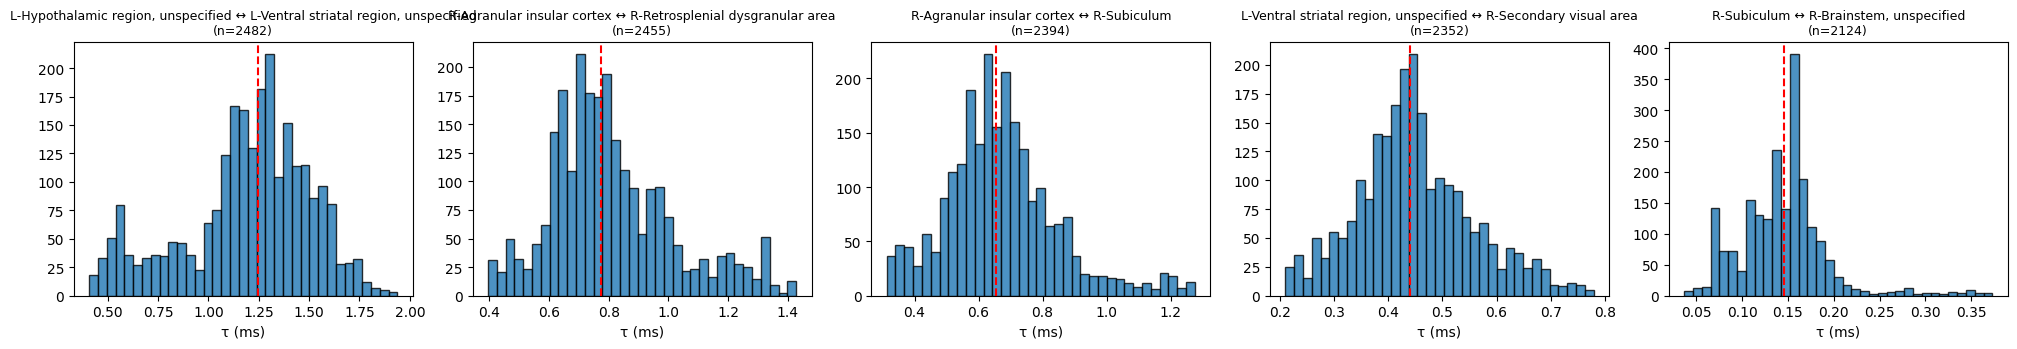

In [31]:
compare_connections(strong_data, roi_names, k= 5, min_measurements=200, strategy="largest")

In [32]:
extract_coherent_cluster(strong_data, (114,132), eps=0.8, min_samples=100, use_residual=False, v_hat_mps=None)

Conexión (114, 132) no encontrada.
